# Project: Ensemble Techniques - Term Deposit Subscription Prediction

# Problem statement (Term Deposit Sale)

## Goal
Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio.
Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### Attribute information
Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
Other attributes:
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

## Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots


## Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30


## Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the
model performance by using different matrices. Use confusion matrix to evaluate
class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance
by using different matrices. Use same metrics as in above model. (at least 3
algorithms) (15 marks)
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
3. Make a DataFrame to compare models and their metric

------------------------------------------------------------------------------------------------------

### Github URL
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-sannidhisiva/tree/master/DecisionTree

# Deliverable – 1 (Exploratory data quality report reflecting the following)

###  1.Load Data

In [1]:
import os,sys
import pandas as pd
import numpy as np
from scipy import stats
# importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
sns.distributions._has_statsmodels=False
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, classification_report, confusion_matrix,auc
from sklearn.metrics import recall_score,precision_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Set color code,font scale..
sns.set(color_codes=True,rc={'figure.figsize':(35.0,35.0)},font_scale=1)
%matplotlib inline 
dataframe = pd.read_csv("bank-full.csv")

In [2]:
dataframe['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [3]:
dataframe

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may       261         1     -1         0  unknown   
1        unknown    5   may       151         1     -1         0  unknown   
2        unknown    5   may        76         1     -1         0  unknown   
3        unknown    5   may        92         1     -1         0  unknown   
4        unknown    5   may       198         1     -1         0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov       977         3     -1         0  unknown   
45207   cellular   17   nov       456         2     -1         0  unknown   
45208   cellular   17   nov      1127         5    184         3  success   
45209  telephone   17   nov       508         4     -1         0  unknown   
45210   cellular   17   nov       361         2    188        11    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

###  2. Attributes Info: 

In [4]:
dataframe.shape

(45211, 17)

In [5]:
#Unique Values
display(dataframe.nunique())

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Can Check if it there is any Null Values with below way

print(dataframe.info())

#SHAPE
print(dataframe.shape)

#Describe-FIVE POINTS SUMMARY
print(dataframe.describe())

print(dataframe.isnull().any())

print(dataframe.isnull().sum().sum())

display(dataframe.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
(45211, 17)
                age        balance           day      duration      campaign  \
co

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# Observation

### Integer : 
    
There are 7 integer(Numeric) type attributes 
 
#### age : Age Of customer
 
#### Balance : The Customer Holds
 
#### Day : Here means the last contact day of the week (which is a categorical value :'mon','tue','wed','thu','fri'
 
#### duration: last contact duration, in seconds (numeric).         
 
#### Campaign: the number of contacts performed during this campaign and for this client (numeric, includes last contact)
 
#### pdays: pdays: the number of days that passed by after the client was last contacted from a previous campaign 
 
#### previous: number of contacts performed before this campaign and for this client (numeric)

----------------------------------------------------------------------------------------
    
### Categorical
    
####  job:  a type of job 
     
#### marital:marital status 
     
#### education:level of eduaction of the customer
     
#### default: customer has credit in default or not ? 
     
#### housing: whether customer has a housing loan or not ? 
     
#### loan: Means if customer has personal loan or not ? 
     
#### contact: means the type of contact communication which happened with the customer

#### month: last contact month of year when bank contacted with the customer 
     
#### poutcome: what was the outcome of the previous marketing campaign 
     
                                            
## Target Variable :     

Target: Means , has the client subscribed a term deposit? ( 'yes','no')                     
                                          
       
    

In [8]:
dataframe.describe().T

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

Insights From Descriptive: 
    
Age 
 - Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
 - Age has mean and median almost equal to 40, it shows that the aga data is normally distributed

Balance: 
  - Averege bank balance is 1,362
  - Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.
  - Mean & Median value of the balance attribute has lot of difference which means you will find high level of data skewness and outlier in its distribution



In [9]:
#Creating Profile Report for Analysis
#!pip install pandas_profiling
import pandas_profiling
dataframe.profile_report()

### observation
previous is highly skewed (γ1 = 41.84645447)	Skewed

balance has 3514 (7.8%) zeros	Zeros

previous has 36954 (81.7%) zeros	Zeros

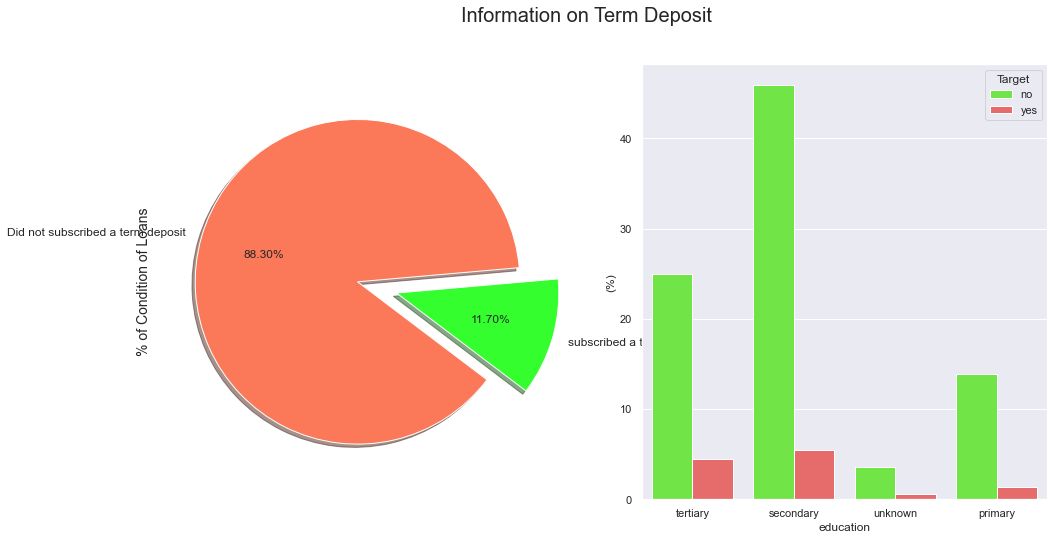

In [10]:
df=dataframe
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FB7858", "#34FE2E"]
labels ="Did not subscribed a term deposit", "subscribed a term deposit"

plt.suptitle('Information on Term Deposit', fontsize=20)

df["Target"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=5)


ax[0].set_ylabel('% of Condition of Loans', fontsize=14)
palette = ["#65FE2E", "#FA5858"]
sns.barplot(x="education", y="balance", hue="Target", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

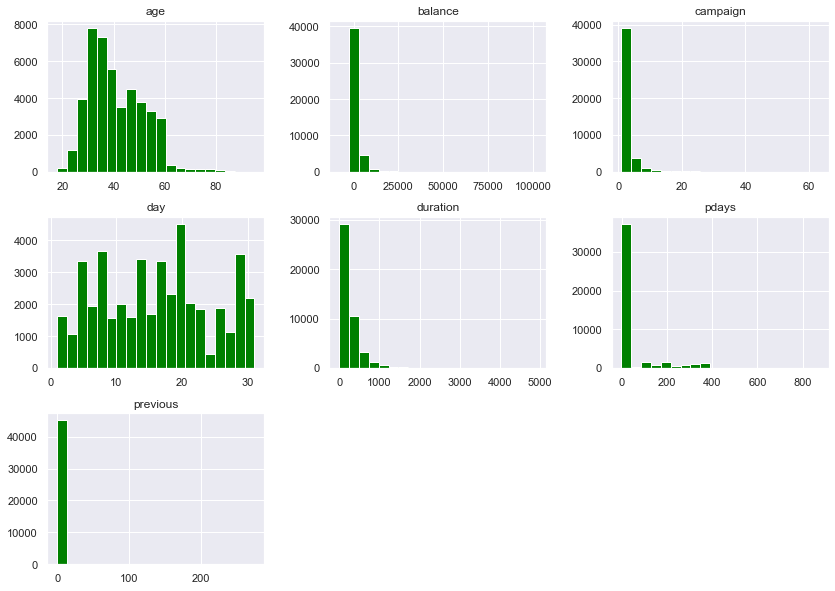

In [11]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(14,10), color='green')
plt.show()

# 3 : Missing Data

As we can see from the above descriptive stats there seems to be no missing values 
But there are value like, “other”, which are not adding any significance.
These values are removed from the dataset.

In [12]:
dataframe['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [13]:
# Step 1: Delete the rows in the 'poutcome' columns where values  is 'other' as it is not helping in any inferences
delcondition = dataframe.poutcome == 'other'
dataframe.drop(dataframe[delcondition].index, axis = 0, inplace = True)
print("dataframe is :", dataframe['poutcome'].value_counts())
df=dataframe

dataframe is : unknown    36959
failure     4901
success     1511
Name: poutcome, dtype: int64


In [14]:
dataframe.shape

(43371, 17)

# 4 UNIVARIATE ANALYSIS: 
    

Let's Convert duration attributes from seconds to minute to have better measure and analysis

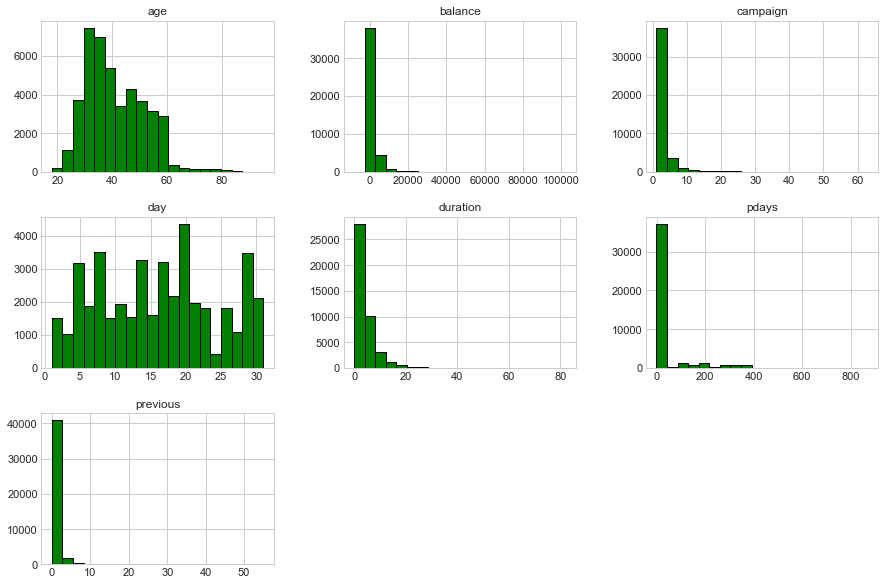

stats of duration count    43371.000000
mean         4.304463
std          4.299182
min          0.000000
25%          1.720000
50%          3.000000
75%          5.300000
max         81.970000
Name: duration, dtype: float64
stats of campaign count    43371.000000
mean         2.776671
std          3.138053
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
stats of day count    43371.000000
mean        15.862904
std          8.324122
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
stats of no of day past the campaign was last done:  count    43371.000000
mean        32.158954
std         90.689195
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [15]:
newdf = dataframe.copy()
newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)
plt.style.use('seaborn-whitegrid')
newdf.hist(bins=20, figsize=(15,10), color='green', edgecolor = 'black')
plt.show()
#print("Descriptive stats of age",dataframe1['age'].describe())
print("stats of duration",newdf['duration'].describe())
print("stats of campaign",newdf['campaign'].describe())
print("stats of day", newdf['day'].describe())
print("stats of no of day past the campaign was last done: ", newdf['pdays'].describe())

In [16]:
newdf[newdf['balance']<0]

age          job   marital  education default  balance housing loan  \
25      44       admin.   married  secondary      no     -372     yes   no   
28      46   management    single  secondary      no     -246     yes   no   
36      25  blue-collar   married  secondary      no       -7     yes   no   
37      53   technician   married  secondary      no       -3      no   no   
45      36       admin.    single    primary      no     -171     yes   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
44626   31     services    single  secondary      no     -205      no   no   
44629   28  blue-collar    single  secondary      no      -46     yes   no   
44836   33  blue-collar   married    primary      no     -195      no   no   
44908   48   management  divorced   tertiary      no     -130     yes   no   
44964   21  blue-collar    single    primary      no      -42      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
25      unknown    5   may      2.87         1     -1         0  unknown   
28      unknown    5   may      4.25         2     -1         0  unknown   
36      unknown    5   may      6.08         1     -1         0  unknown   
37      unknown    5   may     27.77         1     -1         0  unknown   
45      unknown    5   may      4.03         1     -1         0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
44626  cellular    1   sep      8.02         1    579         1  failure   
44629  cellular    1   sep      3.32         1     92        14  success   
44836   unknown   20   sep      0.15         1     -1         0  unknown   
44908  cellular   29   sep      1.83         2     61         9  failure   
44964   unknown   10   oct      0.08         1     -1         0  unknown   

      Target  
25        no  
28        no  
36        no  
37        no  
45        no  
...      ...  
44626    yes  
44629    yes  
44836     no  
44908     no  
44964     no  

[3638 rows x 17 columns]

# Quick Observation:

#### AGE:
  - Age looks uniformally distributed with small standard deviation.
  - Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional
  -33 to 48 years old fall within the 25th to 75th percentiles
  
#### Balance: 
  
   - Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going forward. 
   - There are around 3700, with negative bank balance which may not be interested in fd at all as they are struggling with finance. 

#### Duration : 
   As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers.
        
#### Campaign: 
The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 63 times, which is not normal. These clients may have some special needs that require frequent contact.   
   

# Boxplot(Univariate analysis) : For Numercial Attributes: 

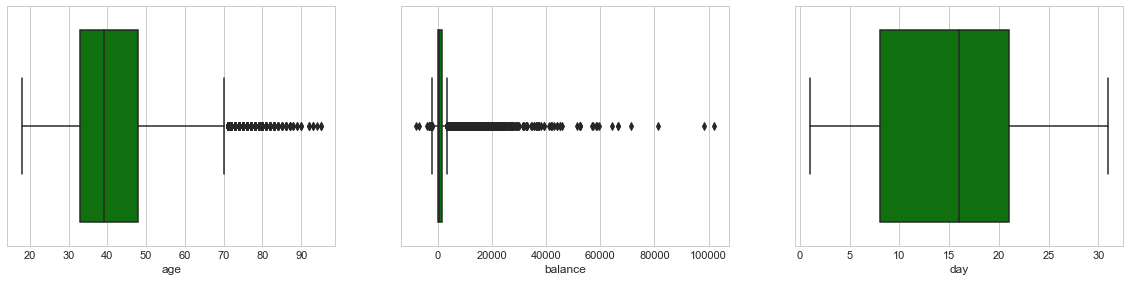

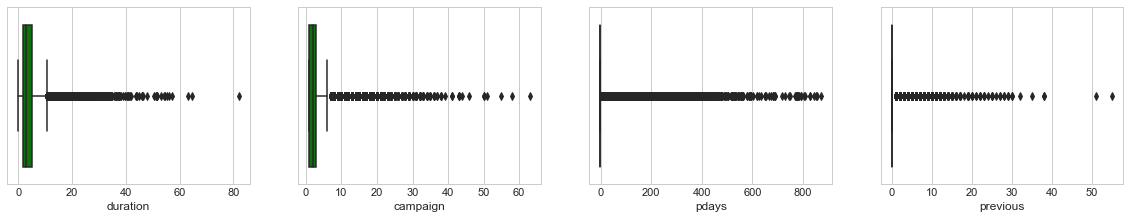

In [17]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf.age, color='green')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='green')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='green')

plt.show()

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= newdf.duration, color='green')

plt.subplot(4,4,2)
sns.boxplot(x= newdf.campaign, color='green')

plt.subplot(4,4,3)
sns.boxplot(x= newdf.pdays, color='green')

plt.subplot(4,4,4)
sns.boxplot(x= newdf.previous, color='green')

plt.show()

### Observation: 
There seems to be an outlier in age, between the age group 70-90.

Max customer falls in the age range of 32-48 . Median age is very close to 40 which i feel banks have targeted considering that hey will will more aligned to take fd option.

In balance attribute there seems to be high level of skewness which we also observed in our histplot analayis. There are some extreme outliers brtween 55k euro to 100k euro. There are long tails towards right side so it seems to be highly skewed. 

Balance attribute needs to be treated for removing the outlier which we will deal next. 

Day attribite seems to be normally distributed with no significant outliers as such. 

Rest of the numerical attribute doesn,t seems to be significant and are highly skewed with long tail mostly on the right side. As they are mostly skewed specially pdays and previous days,. There is nothing to statistically find here. 
  


# Outlers In Balance Attribute: 
   - use of zscore here for the same

In [18]:
#SKEWNESS
from scipy.stats import zscore
import scipy.stats as stats
#Let's check Skew in all numercial attributes
Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataframe.age),stats.skew(dataframe.day),stats.skew(dataframe.balance),stats.skew(dataframe.duration),stats.skew(dataframe.campaign),stats.skew(dataframe.pdays),stats.skew(dataframe.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous'])  # Measure the skeweness of the required columns
Skewness 



Skewness
age       0.667784
day       0.085907
balance   8.248229
duration  3.170122
campaign  4.886130
pdays     3.012910
previous  8.489670

We managed to get rid to some extreme outlier shown below. 


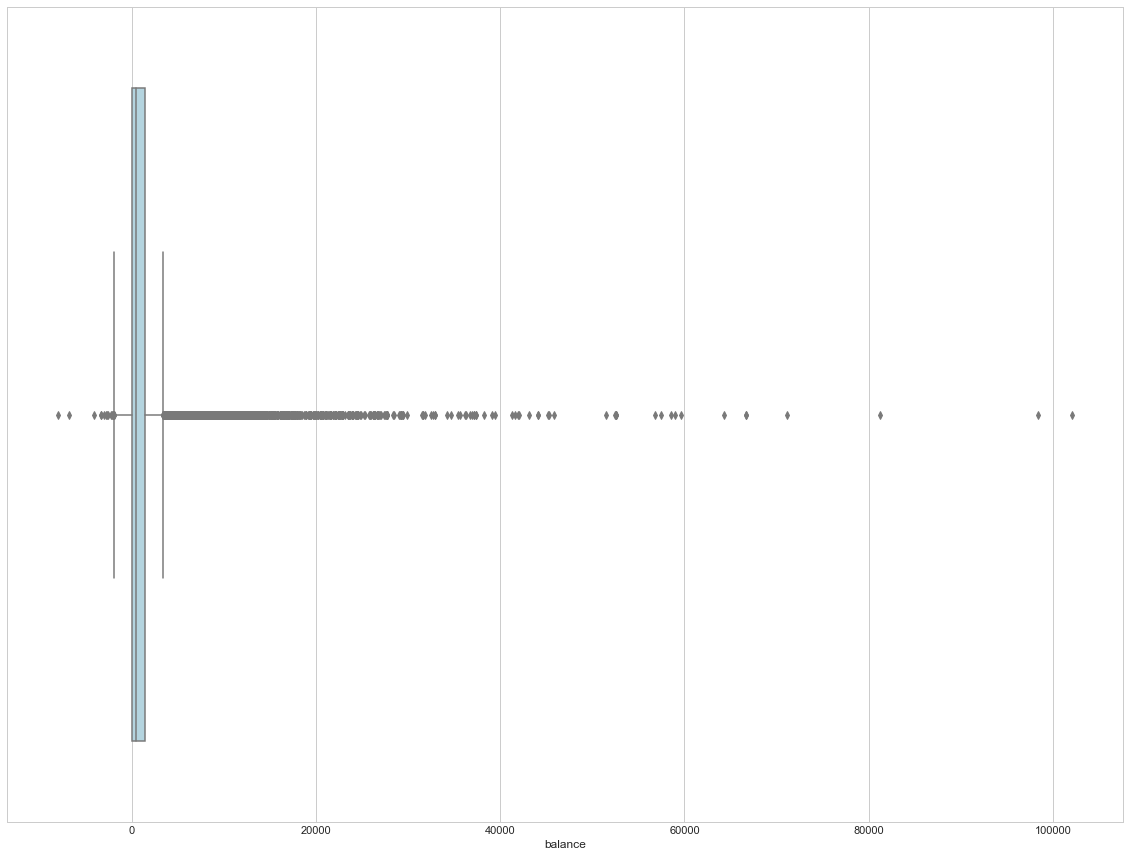

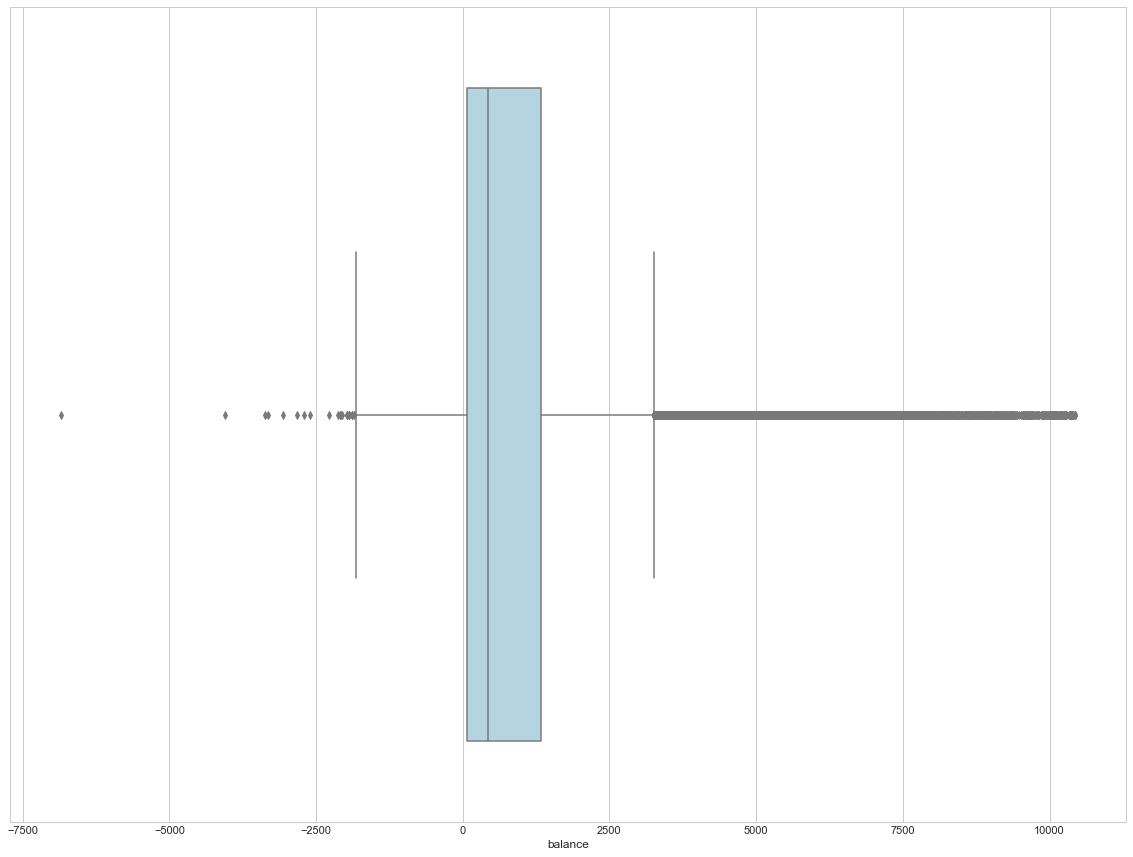

In [19]:
#Removing outliers in balance data using zscore:

from scipy.stats import zscore

newdf[['balance']].mean()
newdf[['balance']].mean()

newdf['balance_outliers'] = newdf['balance']
newdf['balance_outliers']= zscore(newdf['balance_outliers'])

condition1 = (newdf['balance_outliers']>3) | (newdf['balance_outliers']<-3 )
newdf1 = newdf.drop(newdf[condition1].index, axis = 0, inplace = False)
newdf2 = newdf1.drop('balance_outliers', axis=1)

#original one 
plt.figure(figsize= (20,15))
sns.boxplot(x= newdf.balance, color='lightblue')

#After outlier treatment using z score

plt.figure(figsize= (20,15))
sns.boxplot(x= newdf2.balance, color='lightblue')
print("We managed to get rid to some extreme outlier shown below. ")
newdf=newdf2


In [20]:
objdf = newdf.select_dtypes(include ='object') 
objdf.head(5)
objdf.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

# Univariate Analysis: Categorical Data

In [21]:
## category columns
category_variables = objdf.columns
for i in category_variables:
    display(i)
    display(df[i].value_counts(normalize=False))

'job'

blue-collar      9331
management       9065
technician       7298
admin.           4930
services         3977
retired          2181
self-employed    1518
entrepreneur     1448
unemployed       1266
housemaid        1214
student           857
unknown           286
Name: job, dtype: int64

'marital'

married     26227
single      12160
divorced     4984
Name: marital, dtype: int64

'education'

secondary    22215
tertiary     12757
primary       6607
unknown       1792
Name: education, dtype: int64

'default'

no     42572
yes      799
Name: default, dtype: int64

'housing'

yes    23931
no     19440
Name: housing, dtype: int64

'loan'

no     36392
yes     6979
Name: loan, dtype: int64

'contact'

cellular     27648
unknown      12993
telephone     2730
Name: contact, dtype: int64

'month'

may    13175
jul     6849
aug     6161
jun     5271
nov     3758
apr     2680
feb     2397
jan     1258
oct      677
sep      518
mar      439
dec      188
Name: month, dtype: int64

'poutcome'

unknown    36959
failure     4901
success     1511
Name: poutcome, dtype: int64

'Target'

no     38389
yes     4982
Name: Target, dtype: int64

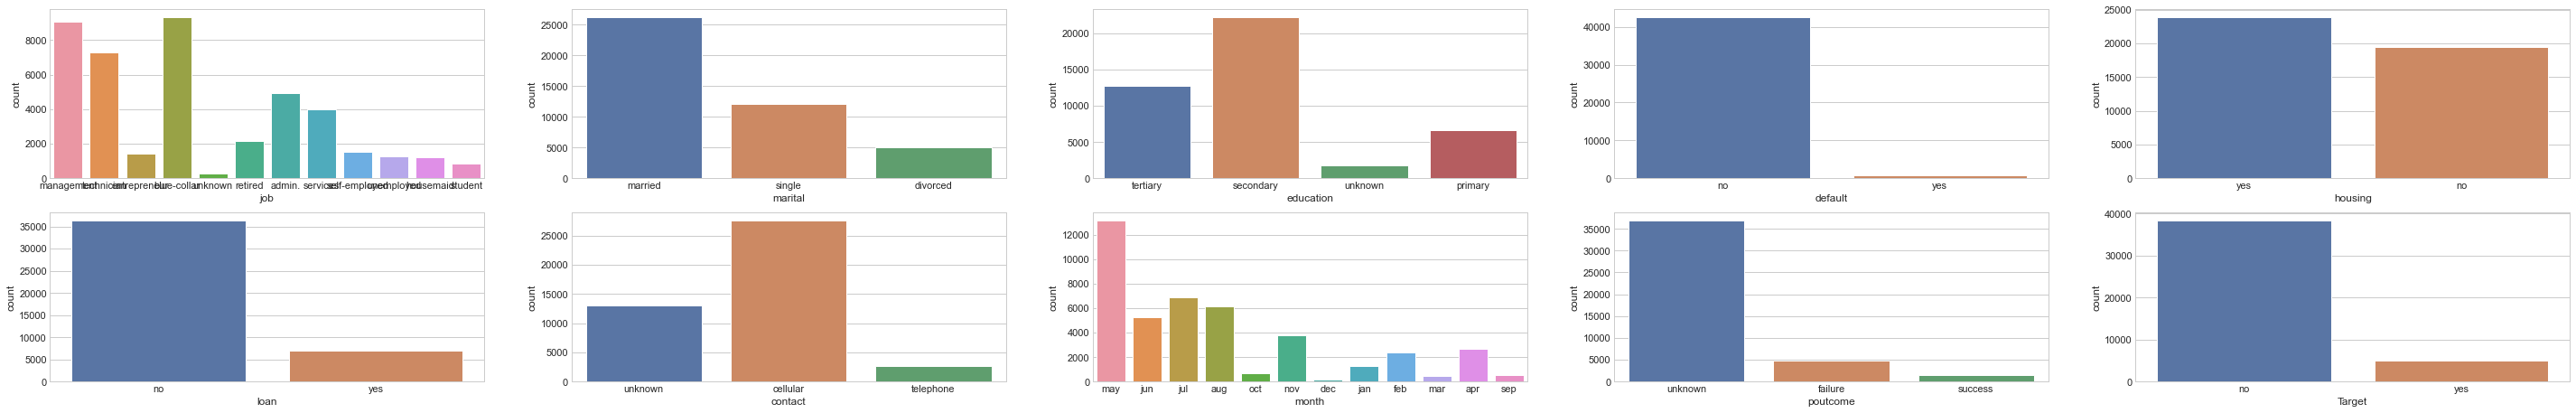

In [22]:
fig=plt.figure(figsize=(50,20))
for i,col in enumerate(category_variables):
    ax=fig.add_subplot(5,5,i+1)
    sns.countplot(df[col])

### Quick Observation On The Above Categorical Plot

Job Type Distribution: 

blue-collar      9331

management       9065

technician       7298

admin.           4930

services         3977

retired          2181

self-employed    1518

entrepreneur     1448

unemployed       1266

housemaid        1214

student           857

unknown           286

Job: 
- Blue-Collar, Management professionals & technicican jobs are in majority which were targeted by the bank. 
- There are some customers who are unemployed, housemaid, student which were also targeted, which is not signitficant customers
- There are few unknowns(around 286) people who were targeted, which don't seems to be a value addition so these needs to be ignored 
- There are also some entrepreneurs and self-employed people which i feel will be hard to convert as fd customer. Chance of entrepreneurs and sel-employed person having FD i feel will be low. 

MaritalStataus:

married     26227

single      12160

divorced     4984

  - ALmost 50% counting to 26227, customers are married which is as expected as they are more savings. 
  - ~25 % people are single , we expect more convesion rate
  - divorced, they account for 11 %, Hard to convert to fd customers.  


EDUCATION: 

Education Level Distribution:

secondary    22215

tertiary     12757

primary       6607

unknown       1792


   - It seems that around 51 % of the targeted customers are having secondar level of education and around 29 % customers are having qualification beyoind 12th class. It means that the targeted customers 51 % with secondary level education is somewhat not as per expectation and the campaign will not bear fruitful result. We neded to rethink the target audience here. Our focus should be more on working profesionals whose qualification will be beyound secondary level. 
   
  -  We also found some unknown customers whose level of education is not clear this needs to be ignored or resampled.
  
  - Arounf 6851 customers are still studying and should not be our target audience.They are very less liskely to take fd option. We will verify the same going forward. 
  
  
  
Credit Default:

Distribution: 
no     42572

yes      799
    
    
    - It is good to see that almost 98 %  of the targeted customers don't default 
     - Only 799 are defaulter and are not credit worthy. These people needs to be ignored while targeting for fd conversion. 
     
no     36392

yes     6979

    - 83 % customers have no personal loan lying with them only 17% people who were targeted have personal loan availed.
    


Distribution Of Mode Of Communication With Customers:  cellular     27168
unknown      12820
telephone     2667
Name: contact, dtype: int64

Distribution Of communication result:  unknown    36358
failure     4827
success     1470
Name: poutcome, dtype: int64

Distribution Of monthly customer contact detail :  may    13048
jul     6794
aug     6050
jun     5163
nov     3599
apr     2627
feb     2354
jan     1252
oct      651
sep      503
mar      432
dec      182
Name: month, dtype: int64

Distribution Of customer W.R.T FD :  no     37785
yes     4870
Name: Target, dtype: int64


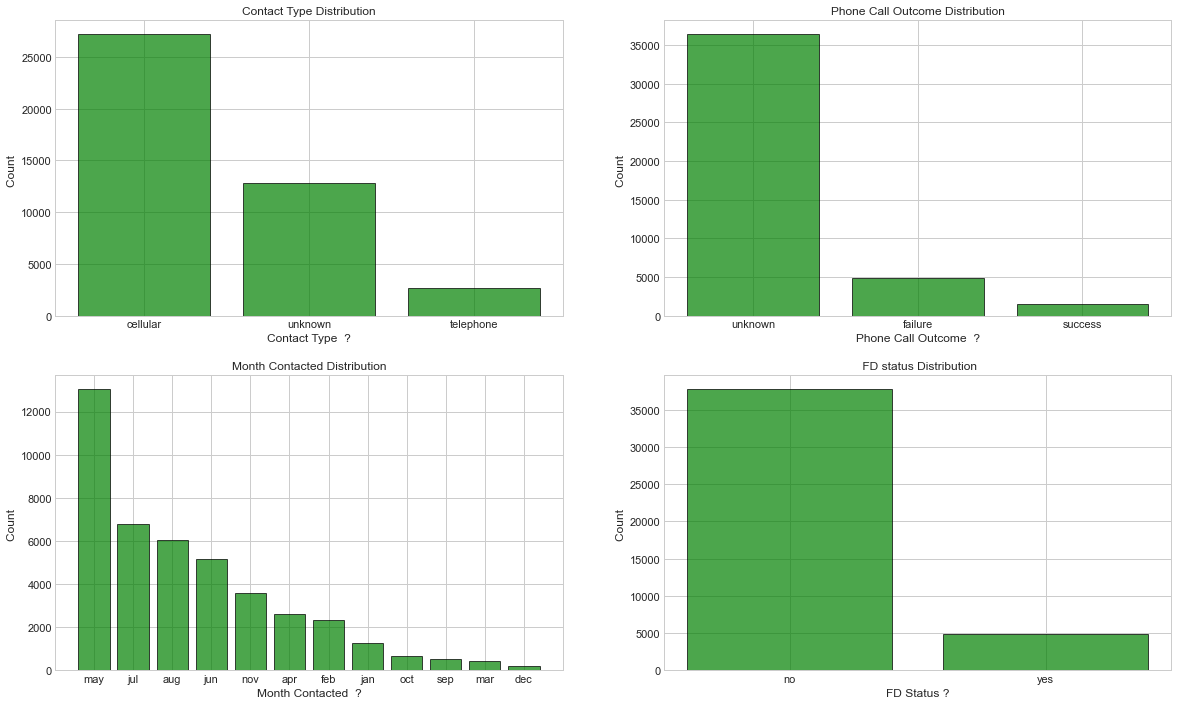

In [23]:

plt.figure(figsize=(20,25))

#Mode of communication with customers
x6 = newdf.contact.value_counts().index    #Values for x-axis
y6 = [newdf['contact'].value_counts()[o] for o in x6]   # Count of each class on y-axis

print("\nDistribution Of Mode Of Communication With Customers: ", newdf.contact.value_counts())

plt.subplot(4,2,1)
plt.bar(x6,y6, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Contact Type  ?')
plt.ylabel('Count ')
plt.title("Contact Type Distribution")

#communication result

x7 = newdf.poutcome.value_counts().index    #Values for x-axis
y7 = [newdf['poutcome'].value_counts()[p] for p in x7]   # Count of each class on y-axis

print("\nDistribution Of communication result: ", newdf.poutcome.value_counts())

plt.subplot(4,2,2)
plt.bar(x7,y7, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Phone Call Outcome  ?')
plt.ylabel('Count ')
plt.title("Phone Call Outcome Distribution")

#month when customer was last contacted

x8 = newdf.month.value_counts().index    #Values for x-axis
y8 = [newdf['month'].value_counts()[q] for q in x8]   # Count of each class on y-axis

print("\nDistribution Of monthly customer contact detail : ", newdf.month.value_counts())
plt.subplot(4,2,3)
plt.bar(x8,y8, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Month Contacted  ?')
plt.ylabel('Count ')
plt.title("Month Contacted Distribution")


#FD status Which is our target variable

x9 = newdf.Target.value_counts().index    #Values for x-axis
y9 = [newdf['Target'].value_counts()[r] for r in x9]   # Count of each class on y-axis

print("\nDistribution Of customer W.R.T FD : ", newdf.Target.value_counts())
plt.subplot(4,2,4)
plt.bar(x9,y9, align='center',color = 'green',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('FD Status ?')
plt.ylabel('Count ')
plt.title(" FD status Distribution")

plt.show()


Quick Observation On Above Category Plot : 
    
## Mode Of Communication With Customer: 

cellular     27168

unknown      12820

telephone     2667

    - Around 64 % mobile phone was used to contact potential customer. It will be interesting to see what was the call duration for the same, as it will impact the conversion rate to larger extent
    
    - Almost 28 % people mode of communication has ot been captured as needed with unknown categorization . These data don't seems to add any value as we don't know how to infer the outcome here.
    
    - Landline as expected has very low share as a mode of client communication. 
    
    
    
## Phone Call Outcome:

unknown    36358

failure     4827

success     1470


## Month Wise Distribution , in a given year When Customer Wsa Last Contacted

may    13048

jul     6794

aug     6050

jun     5163

nov     3599

apr     2627

feb     2354

jan     1252

oct      651

sep      503

mar      432

dec      182

  - May month seems to have more frequency(13048) where banl connected to the potential customer for FD campaign. It can be also dure to previous year financial closing and to add new customers for FD instrument,
    to increase bank revenue.
    
  - Jun, July , August also have far share but not as mich compared to may month
  
  
 
 Target(FD) Variable :
 
   no     37785
   
   yes     4870
        
        - Most of the contacted customers seems to be not interested in FD.

    

# 3.2-  BIVARIATE ANALYSIS:



   

#  Term Deposit based on their age 

We Will making using of count plot with Target var as hue.
    

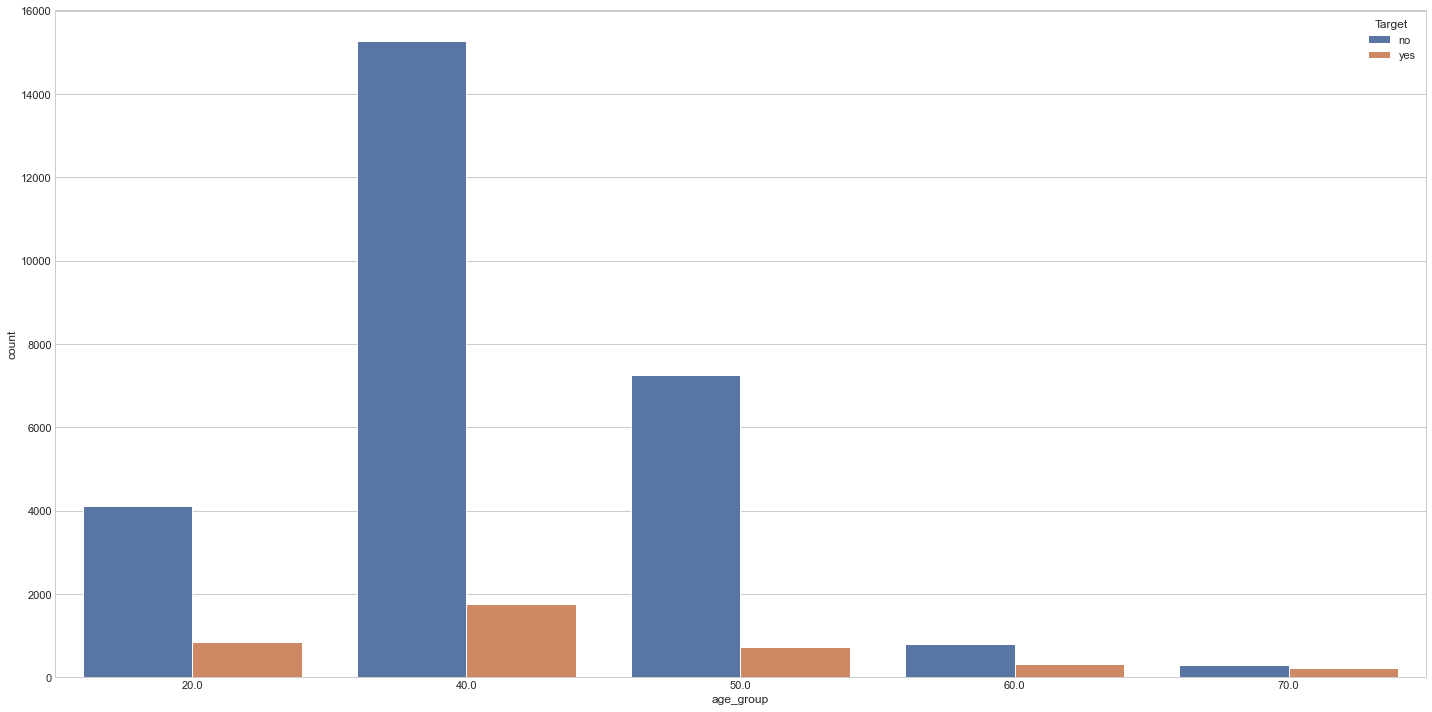

In [24]:
lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[(column["age"] >= 60) & (column["age"] <= 69), 'age_group'] = 60
    column.loc[column["age"] >= 70, 'age_group'] = 70
    
count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 
age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)
age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)
plt.figure(figsize=(20,10))
sns.countplot(newdf2['age_group'], hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
      - Term Deposit rate is higher among young people between the age of 30-40

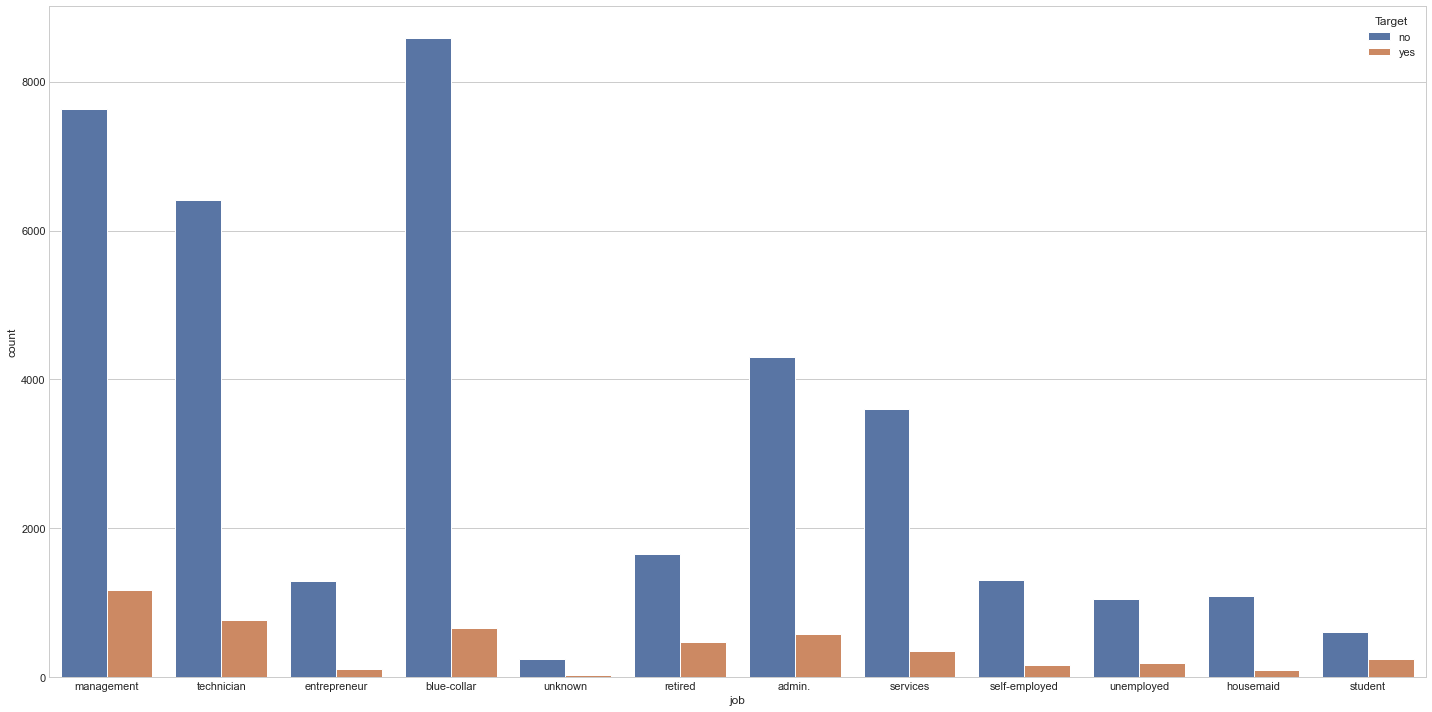

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.job, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
      - Management professional seems to be more likely to avail FD option here. 
      - Technician also seems to faring well along with blue collar professionals.   

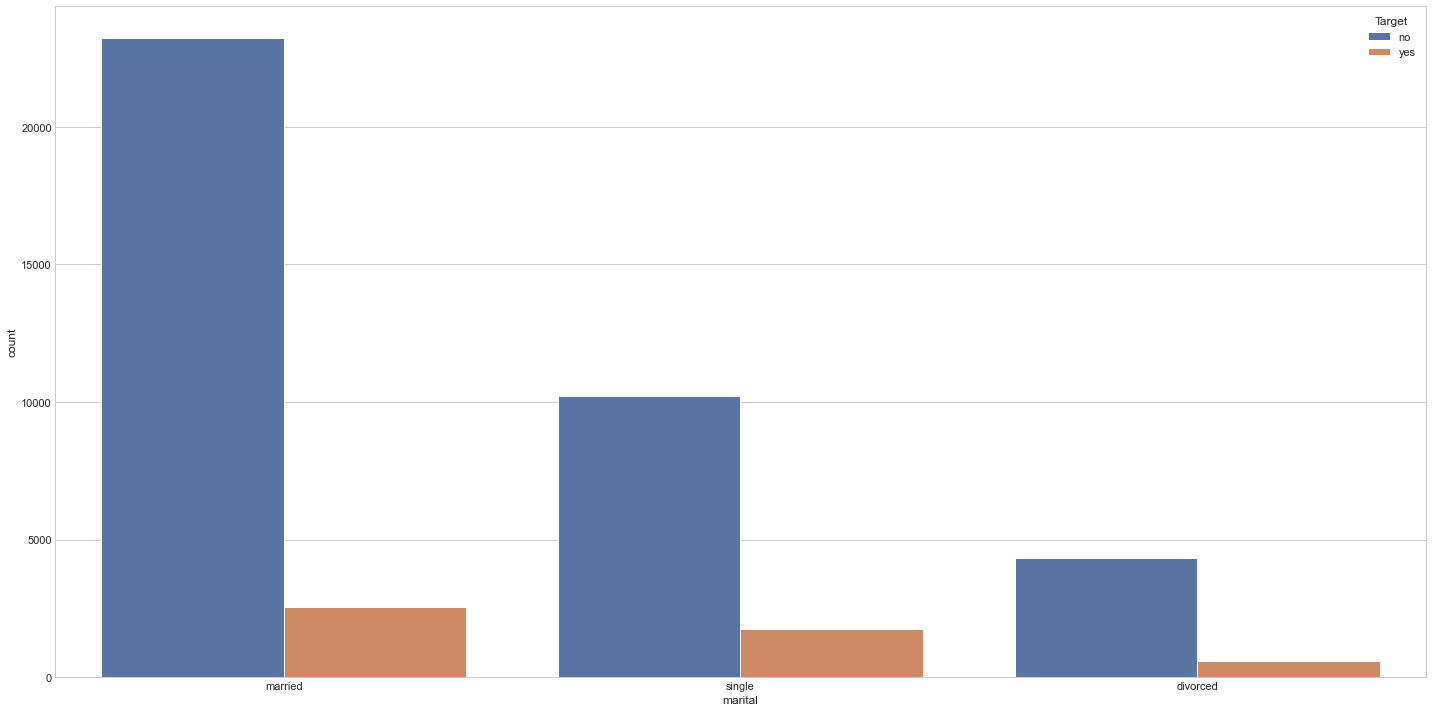

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.marital, hue = "Target", data=newdf2)
plt.tight_layout()

Marital Status Impacts On Term Deposit :

 - Married customers  has higher Term Deposit, divorced people are broken and are less likely to avail FD 

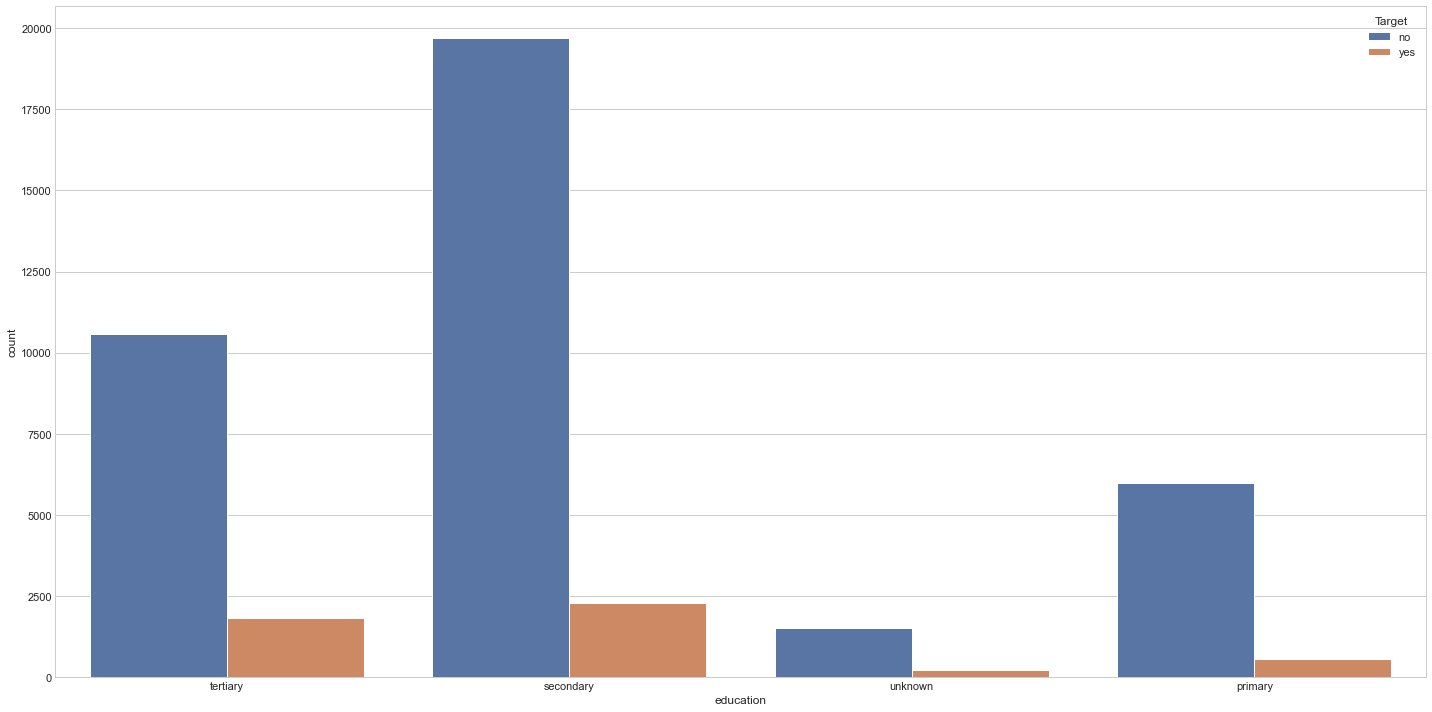

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.education, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 

   - Higher the education level higher is the rate of Term Deposit
   

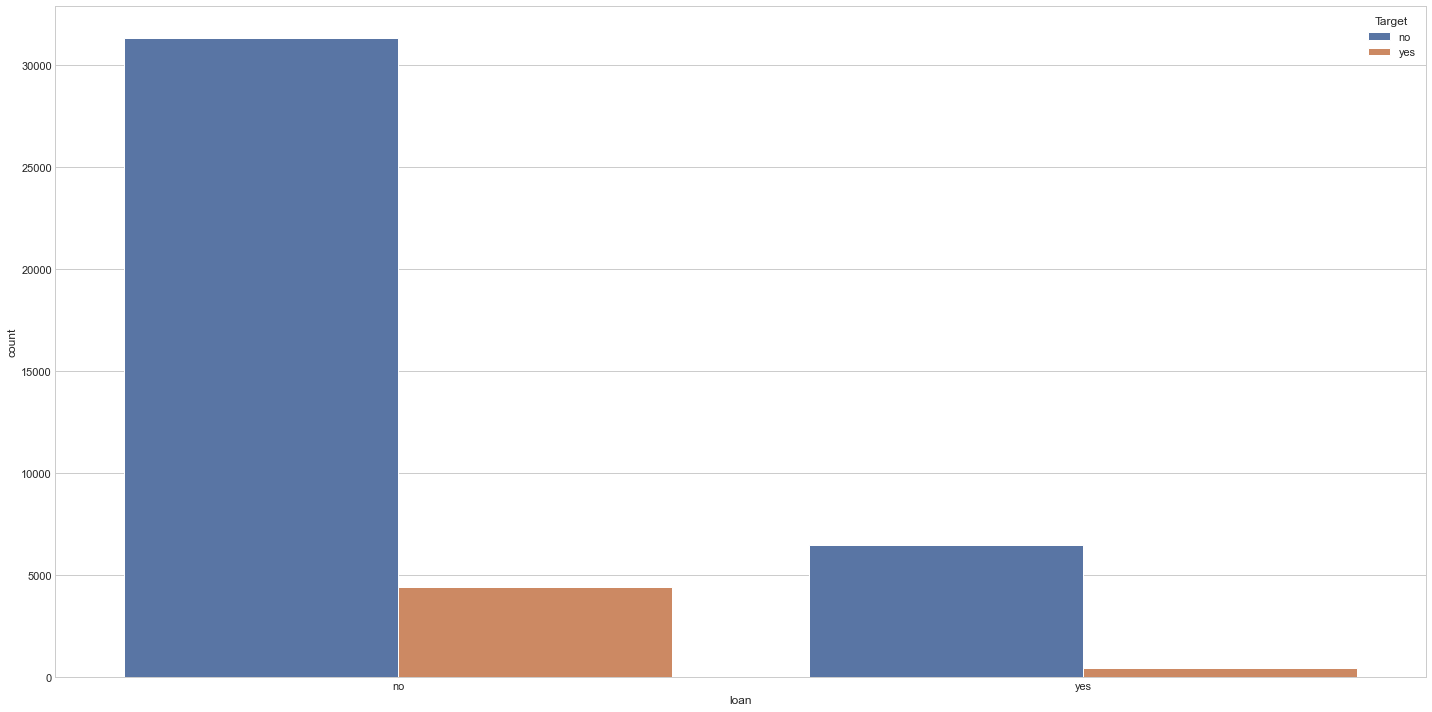

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.loan, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights:
   - Customer with no Personal loan has higher Term Deposit. 

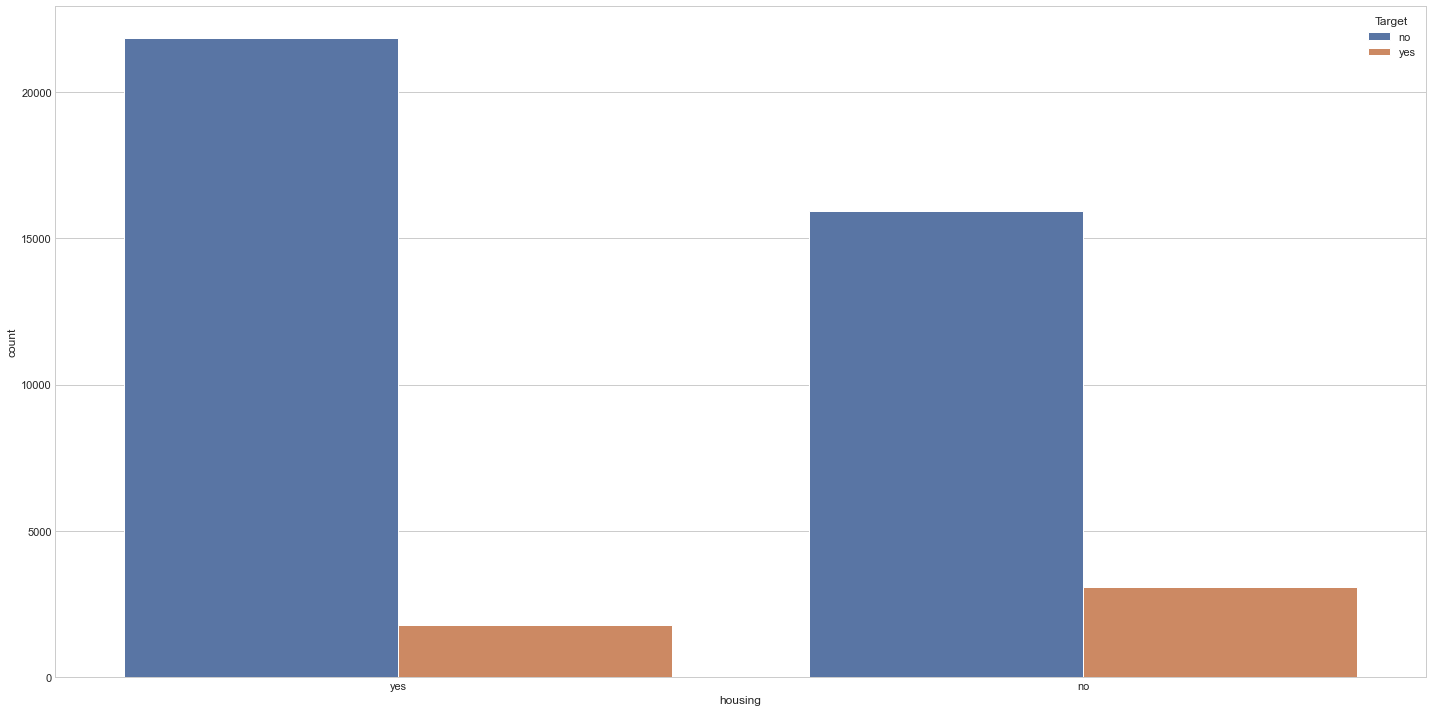

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.housing, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
   - Person who has past housing loan seems to avoid Term Deposit 

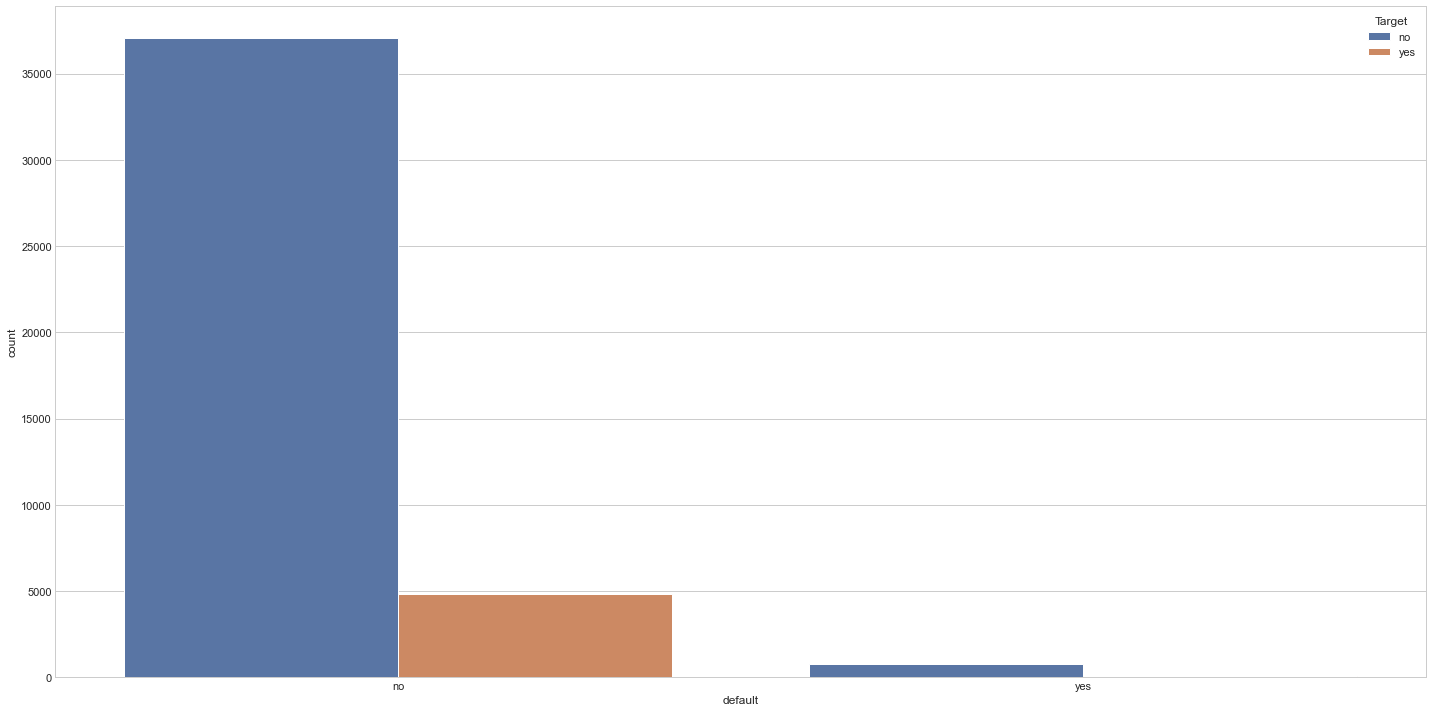

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.default, hue = "Target", data=newdf2)
plt.tight_layout()

Quick Insights: 
     - As expected customer with no default history are more liley to opt for Term Deposit

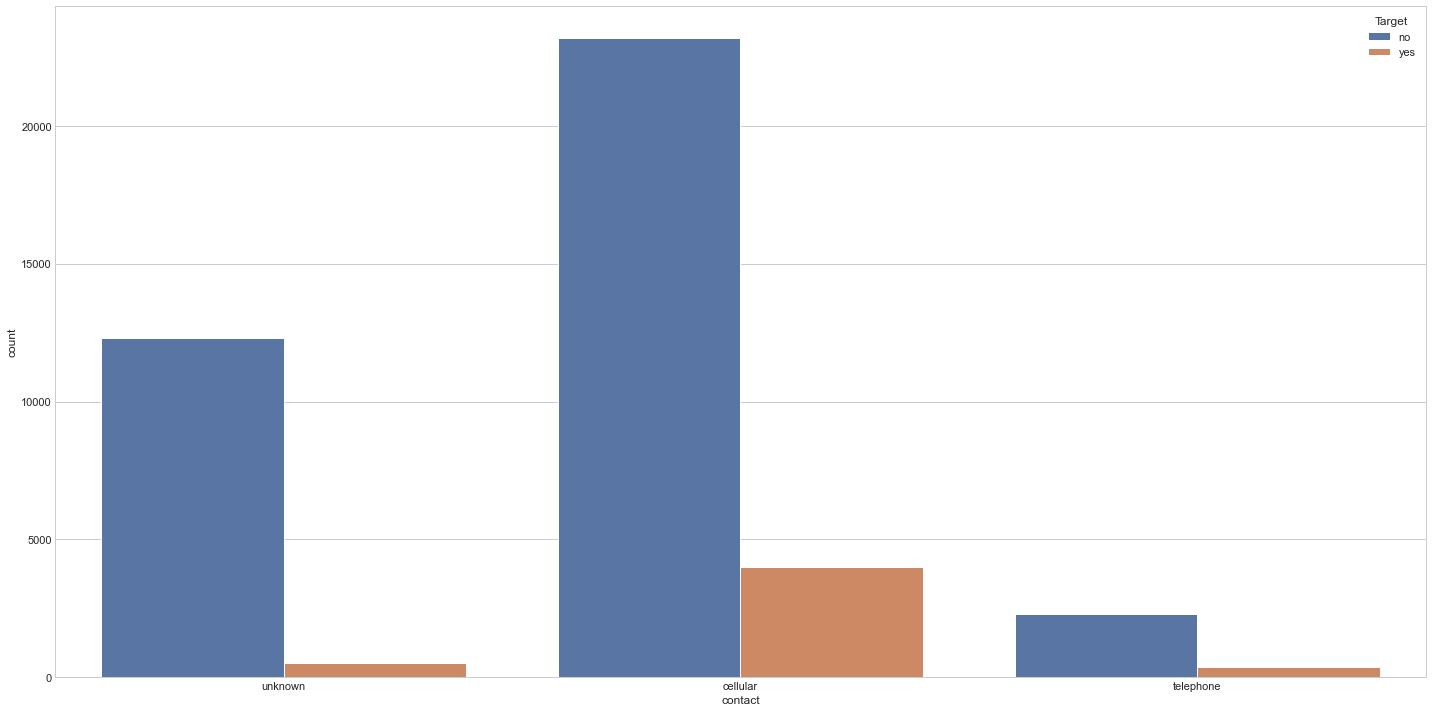

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.contact, hue = "Target", data=newdf2)
plt.tight_layout()


Quick Insights: 
    
    - As expected cellualr as a mode of communication is leading the count and also Term Deposit

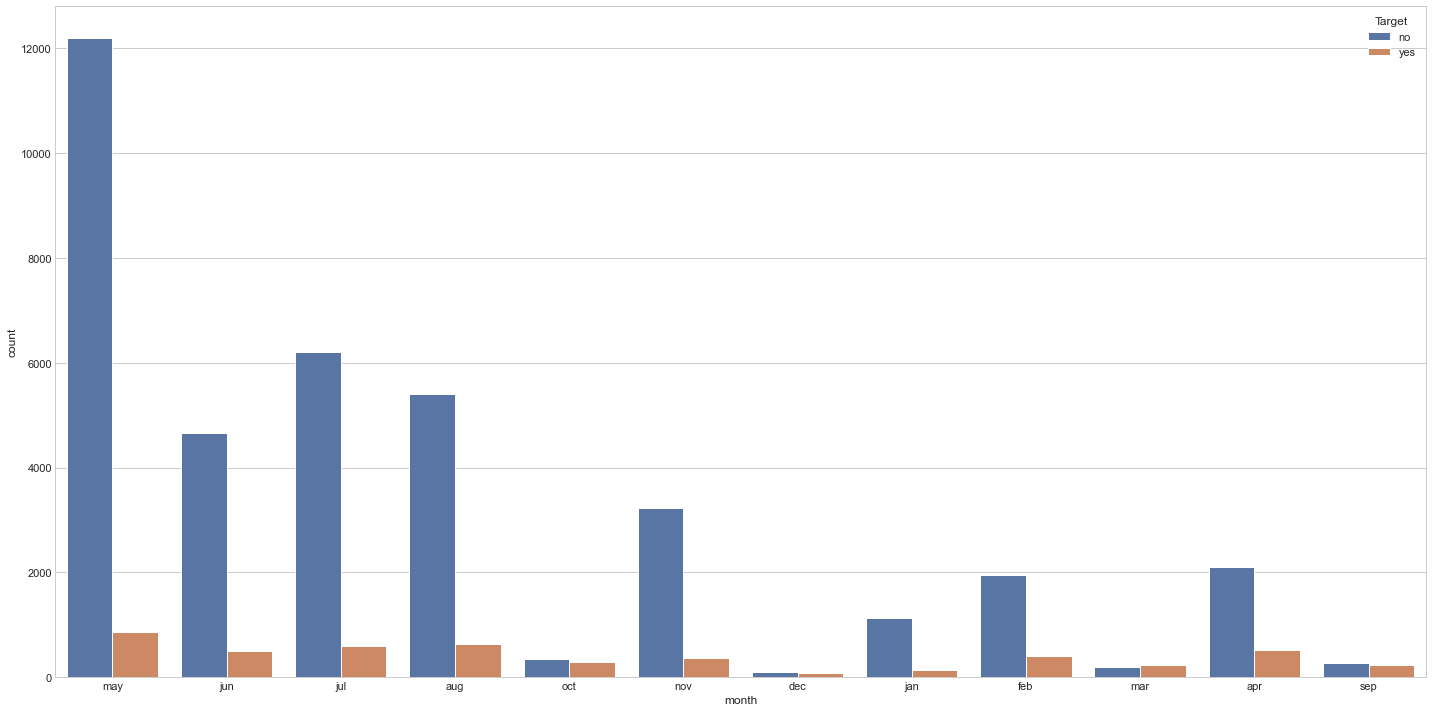

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.month, hue = "Target", data=newdf2)
plt.tight_layout()


Quick Insights: 
    - May month seems to be best time to conact customer for increasing the rate of Term Deposit
    - jun, july, aug also seems to be farring well but march, dec and jan doesn't look idel time to campaign. 

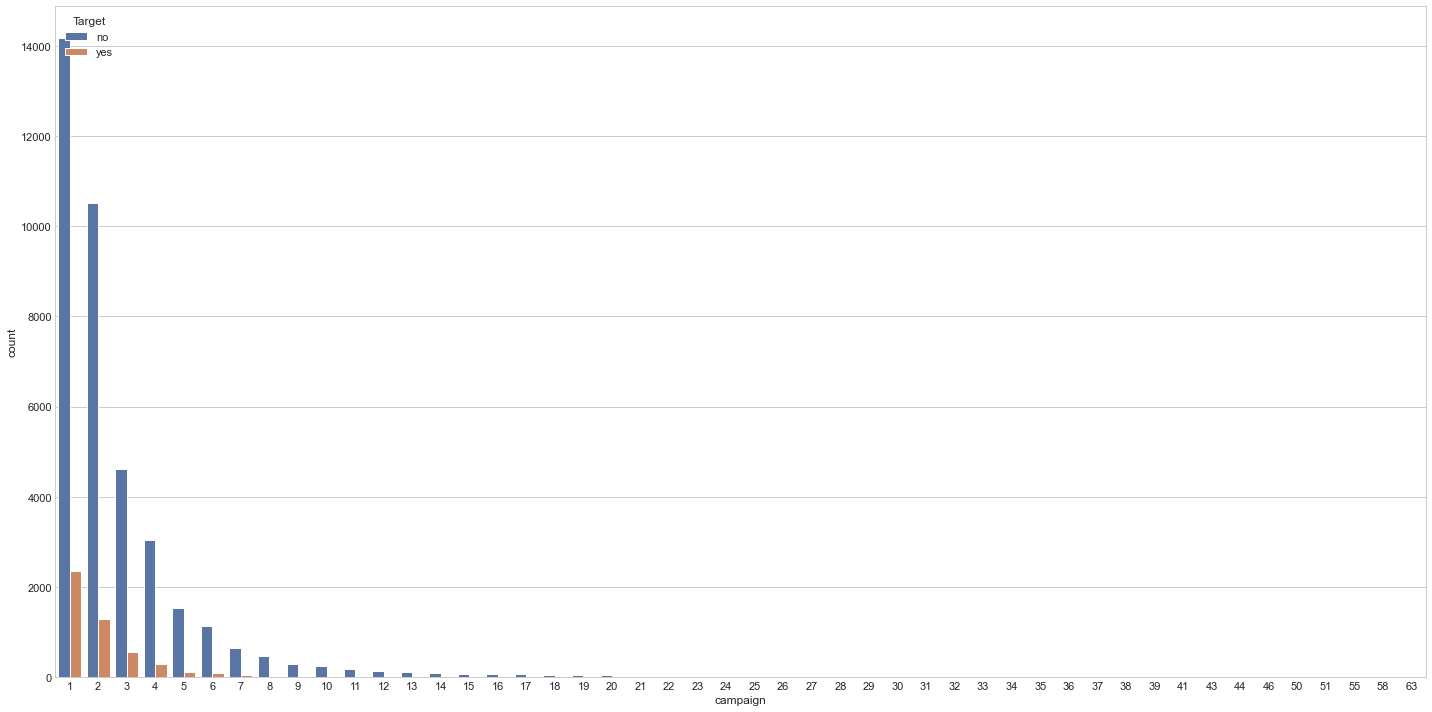

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(newdf2.campaign, hue = "Target", data=newdf2)
plt.tight_layout()

if the customer is contacted not more than 5-6 times they are more likely to opt for Term Deposit.

# AGE & BALANCE REALTIONSHIP: 

Lets see how the bank balance and age are related . We removed some outlier in our balance attribute let;s use that data to see the result 
   

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


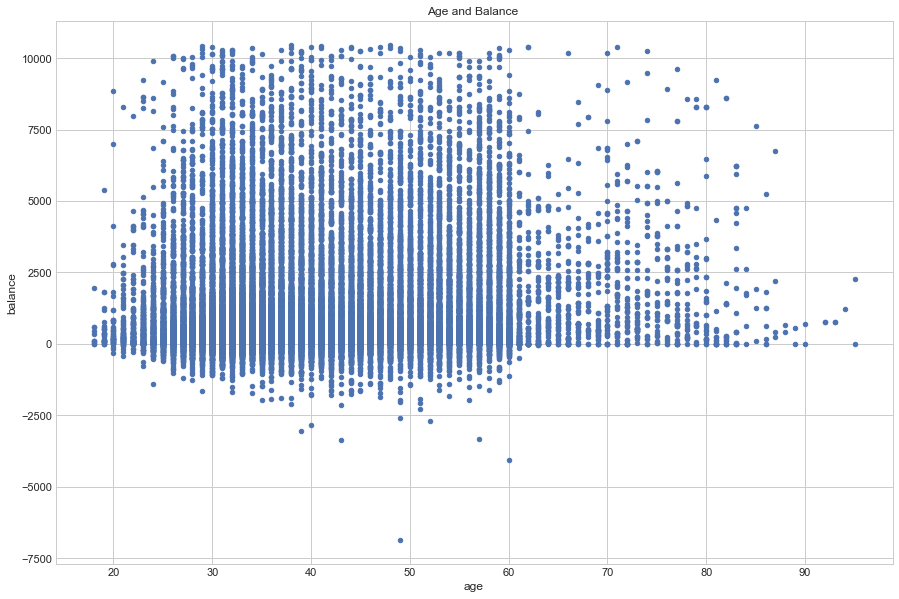

In [34]:
scatter_age_balance = newdf2.plot.scatter('age','balance',figsize = (15,10))
plt.title('Age and Balance ')
plt.show()

# Quick Insights: 

There seems to no linear relationship between age & balance and Based on this scatter plot, there is no clear relationship between client’s age and balance level.


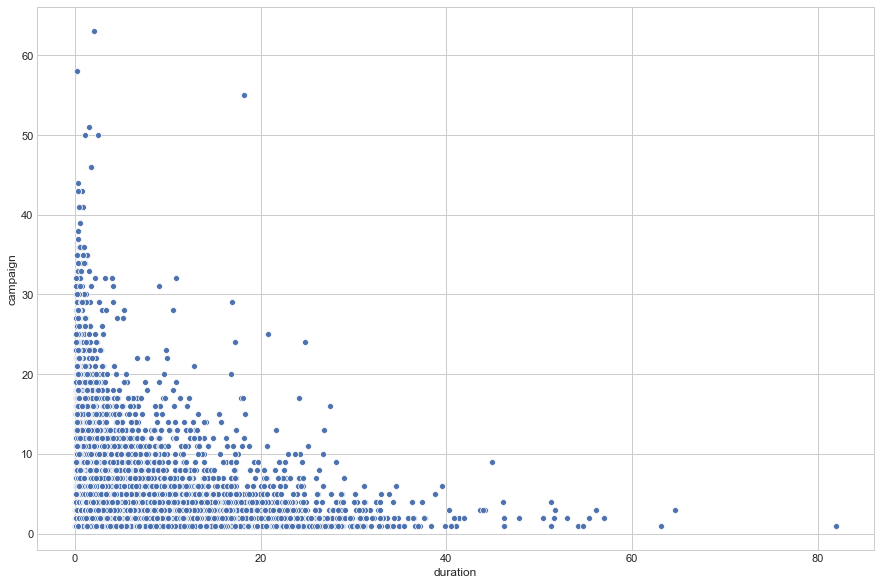

In [35]:
plt.figure(figsize=(15,10))
sns.scatterplot(newdf2.duration, newdf2.campaign, palette= ['green','green'] )
plt.show()

Obseravtion:
we can see some kind trend here, when frequency of contacting the same client increases, call duration which happens with the client decreases, it's a kind of negative correlation.So it is advisable that the less is the frequency longer is the call duration which may result in better conversion rate. 
    


# EDUCATION & BANK BALANCE
   Let's see how  education impacts the bank balance of the customer
  

<ipython-input-36-81178cd4147c>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2= fig.add_subplot(221)


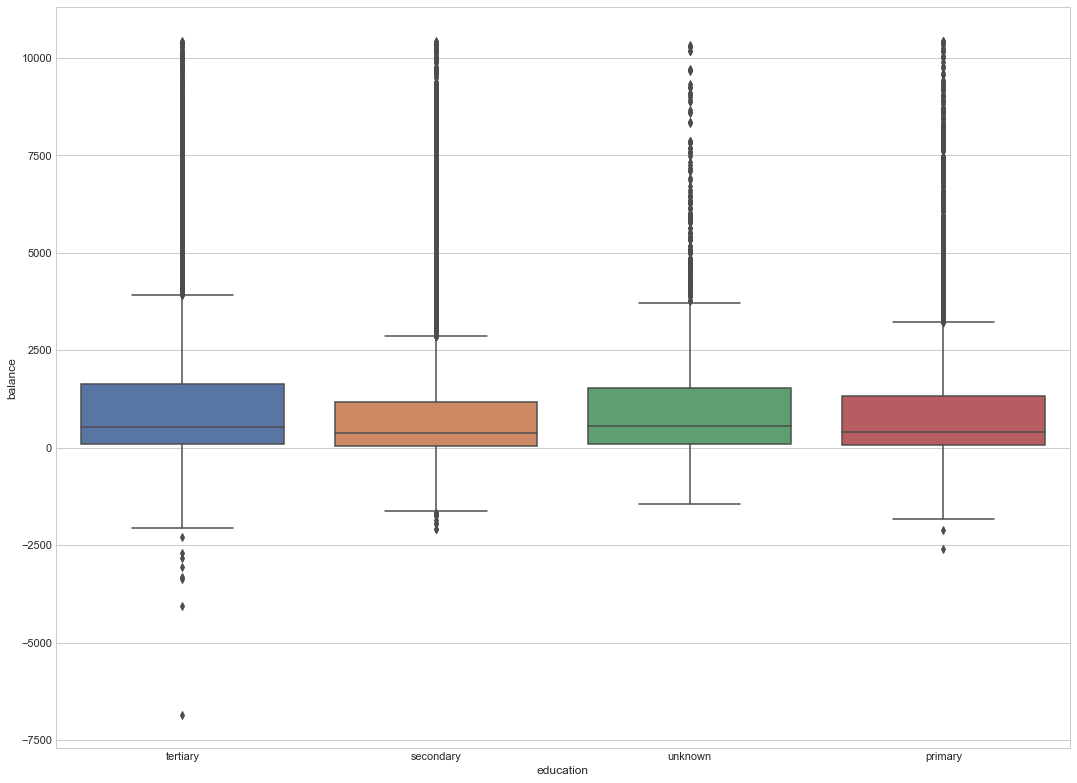

In [36]:
fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax2= fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], data=newdf2, ax =ax1)


In [37]:
print("------------------")
print("MEAN")
print("------------------")
print(newdf2.groupby('Target').mean())
print("------------------")
print("MEDIAN")
print("------------------")
print(newdf2.groupby('Target').median())

------------------
MEAN
------------------
              age      balance        day  duration  campaign      pdays  \
Target                                                                     
no      40.843933  1035.825989  15.963557  3.689051  2.860209  28.628292   
yes     41.660164  1421.056057  15.085421  9.065591  2.140862  60.006982   

        previous  age_group  
Target                       
no      0.362472  40.544188  
yes     0.996715  40.861404  
------------------
MEDIAN
------------------
        age  balance  day  duration  campaign  pdays  previous  age_group
Target                                                                   
no       39      397   16      2.73         2     -1         0       40.0
yes      38      686   15      7.27         2     -1         0       40.0


Quick Insights: 

  - Avearge age of person who subscribed the FD is arond 41
  - Average bank balance lying with the customer with who subscribed to FD is 1421 Euro
  - It is observed the average call duration it took to convert cutomer to buy FD is around 9 minutes. Very less duration call seems to fail in converting the client to buy FD's
  

# How Age Of The Customers Is Related To Term Deposit: 

Target            no        yes
age_group                      
20.0       82.805247  17.194753
30.0       89.650514  10.349486
40.0       91.126187   8.873813
50.0       90.852209   9.147791
60.0       66.605279  33.394721


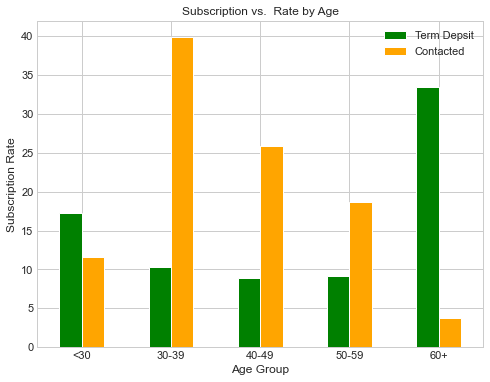

In [38]:
lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['Target'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 
print(count_age_response_pct)

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['Contacted'] = age['age_group']*100/age['age_group'].sum()
age['Term Depsit'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['Term Depsit','Contacted']].plot(kind = 'bar', figsize=(8,6), color = ('green','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs.  Rate by Age')
plt.show()
    
    
    

# Observation: 

Orange Bar plot indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients.

 # Term Deposit subscription rate based on contacted customers balance level
 

Target                  no        yes
balance_group                        
average balance  85.077278  14.922722
high balance     85.054618  14.945382
low balance      89.199714  10.800286
no balance       93.239597   6.760403


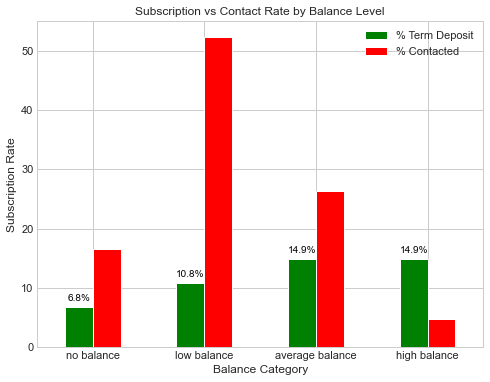

In [39]:

#Let's Seggregate The Balance  & Perform Transaformation To Have Better Insights

lst = [newdf2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
    
count_balance_response_pct = pd.crosstab(newdf2['Target'],newdf2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(newdf2['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Term Deposit'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Term Deposit','% Contacted']].plot(kind = 'bar',
                                               color = ('green','red'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches, bal['% Term Deposit'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1,  label+'%',   ha = 'center', color = 'black')

print(count_balance_response_pct)

#ax = sns.boxplot(newdf2['Target'], newdf2['balance'], data=newdf2)

Quick Insights For FD subscription rate against balance level:


To identify the trend more clearly, we have categorized customers into four groups based on their levels of balance:

No Balance: clients with a negative balance.
Low Balance: clients with a balance between 0 and 1000 euros
Average Balance: clients with a balance between 1000 and 5000 euros.
High Balance: clients with a balance greater than 5000 euros.

   - Our Box Plot shows a positive correlation between clients’ balance levels and fd subscription rate. Clients with negative balances only returned a fd subscription rate of 6.8% while clients with average or high balances had significantly higher FD subscription rates, nearing to  15%.
   
   - We have seen above that more than 50% of customers contacted had the low balance level.So bank has to take care in the future to target cusytomers with high bank balance level. People with negative balance are less likely to subscribe to FD. 

# Term Deposit subscription rate by job¶

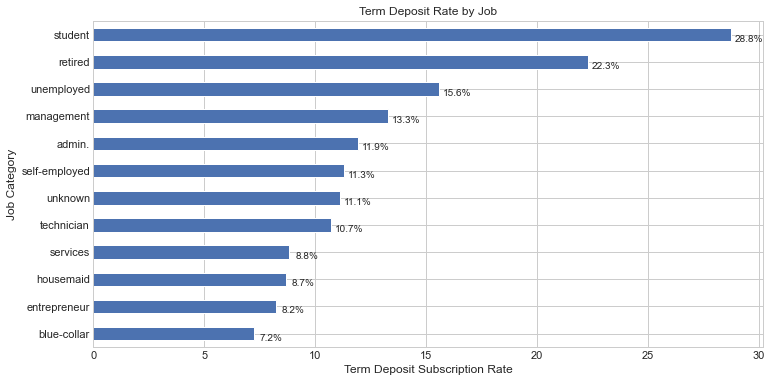

In [40]:
count_job_target_pct = pd.crosstab(newdf2['Target'],newdf2['job']).apply(lambda x: x/x.sum() * 100)
count_job_target_pct = count_job_target_pct.transpose()

plot_job = count_job_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit Rate by Job')
plt.xlabel('Term Deposit Subscription Rate')
plt.ylabel('Job Category')

for rec, label in zip(plot_job.patches, count_job_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insghts: For Term Deposit rate by job¶¶

  - Here it is clearly laid down in our bar chart that students and retired clients account for more than 50% of FD subscription, which is consistent with the previous finding of higher FD subscription rates among the younger and older.

# Term Deposit Subscription Rate Based on Marital Status : 

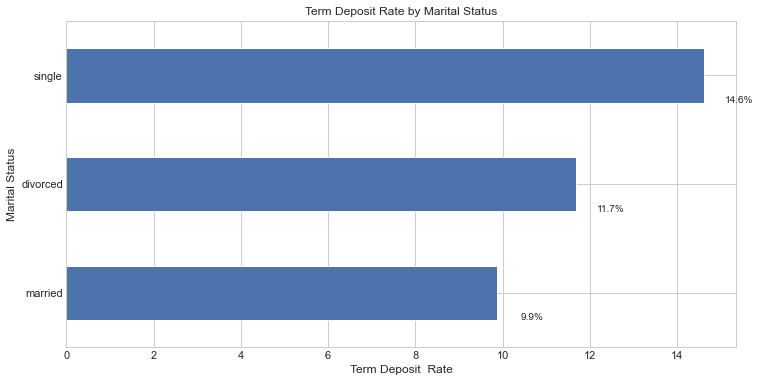

In [41]:
count_marital_target_pct = pd.crosstab(newdf2['Target'],newdf2['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_target_pct = count_marital_target_pct.transpose()

plot_marital = count_marital_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit Rate by Marital Status')
plt.xlabel('Term Deposit  Rate')
plt.ylabel('Marital Status')

# Label each bar
for rec, label in zip(plot_marital.patches, count_marital_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_marital.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insights : Marial Stataus Impact On Term Deposit Subscription: 

   - As we saw above young that young people are more subsciber of FD, here also we can say that young unmarried person are leading the way with 15 % FD subscription rate,out of total subscribed fd customer. 
   - Divorce seems to unexpectedly ranking higher than married customer.
   - Married one's are less oriented towards Term Deposit option.

# Term Deposit Subscription Rate Based on Education Level: 

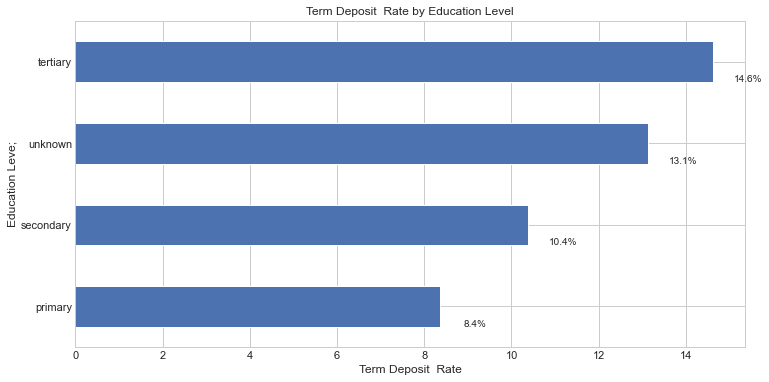

In [42]:
count_education_target_pct = pd.crosstab(newdf2['Target'],newdf2['education']).apply(lambda x: x/x.sum() * 100)
count_education_target_pct= count_education_target_pct.transpose()

plot_education = count_education_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit  Rate by Education Level')
plt.xlabel('Term Deposit  Rate')
plt.ylabel('Education Leve;')

# Label each bar
for rec, label in zip(plot_education.patches, count_education_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insights: people education level distribution who opted for Term Deposit 
   - People with higher level of education has higher subscription rate . Here 15 % people with higher education level opted for FD out of all FD subsciber. 14 % user who education level is not capture as wanted acount for good 13 % out of total FD subscribers
    

# Term Deposit  Rate Based On Personal Loan Status Of The Customers

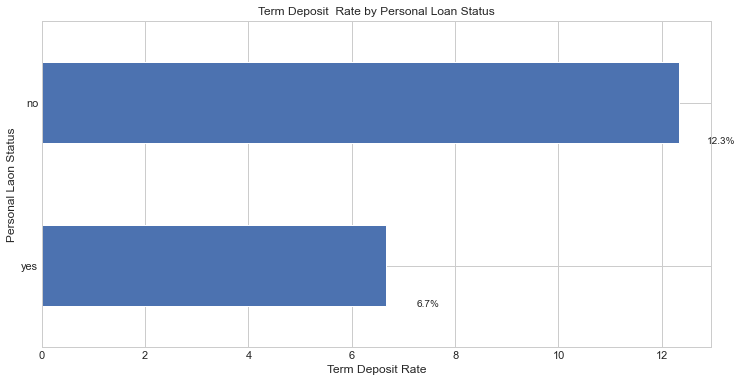

In [43]:
count_loan_target_pct = pd.crosstab(newdf2['Target'],newdf2['loan']).apply(lambda x: x/x.sum() * 100)
count_loan_target_pct= count_loan_target_pct.transpose()

plot_loan = count_loan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit  Rate by Personal Loan Status')
plt.xlabel('Term Deposit Rate')
plt.ylabel('Personal Laon Status')

# Label each bar
for rec, label in zip(plot_loan.patches, count_loan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick insights on Term Deposit Based On Personal Loan Status Of The Customers:
    
     - Person with personal loan on their head seems to less interested in fd , as you can see only 6.7 % of them availed FD option
     - As expected people with no loan on their head a more likely to avail FD options. As it can be seen here that around 12.6 % customer with no pl opted for FD 
    
        

# Impact Of Cutsomers Credit Default On Term Deposit Subscription: 

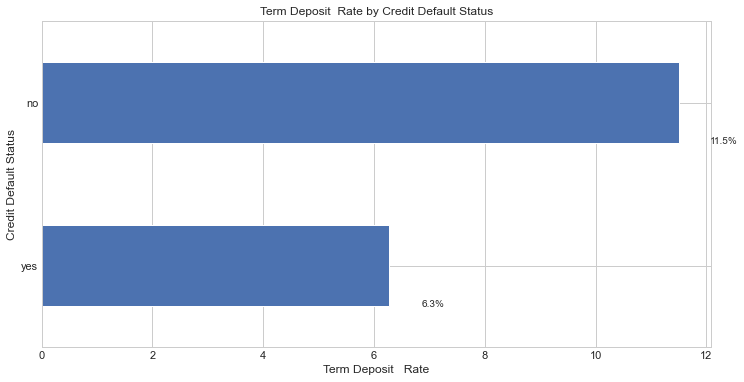

In [44]:
count_creditdefault_target_pct = pd.crosstab(newdf2['Target'],newdf2['default']).apply(lambda x: x/x.sum() * 100)
count_creditdefault_target_pct= count_creditdefault_target_pct.transpose()

plot_credit_default = count_creditdefault_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit  Rate by Credit Default Status')
plt.xlabel('Term Deposit   Rate')
plt.ylabel('Credit Default Status')

# Label each bar
for rec, label in zip(plot_credit_default.patches, count_creditdefault_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_credit_default.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insights On How Credit Default Status Is Related To Term Deposit: 

    - We can see that person with no default credit stastus has higher Term Deposit subscription which is as per expectations. They account for around 12 %.
    - Person with credit default history accounts for 6.4 % Term Deposit. 
    

# Let's See How People With Housing loan responded to Term Deposit subscription camapign

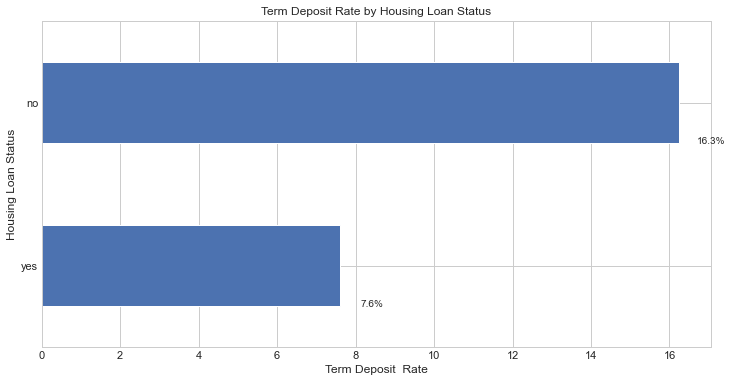

In [45]:
count_housingloan_target_pct = pd.crosstab(dataframe['Target'],dataframe['housing']).apply(lambda x: x/x.sum() * 100)
count_housingloan_target_pct= count_housingloan_target_pct.transpose()

plot_housing_loan = count_housingloan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit Rate by Housing Loan Status')
plt.xlabel('Term Deposit  Rate')
plt.ylabel('Housing Loan Status')

# Label each bar
for rec, label in zip(plot_housing_loan.patches, count_housingloan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_housing_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')



Quick Insights: 
    
    - customers with houing loan on their head are less likley to avail Term Deposit, here only 8 % of the customers with already having  housing loan availed fd option. This is as expected
    - around 17 % of the cutomers with no housing loan opted for Term Deposit . 

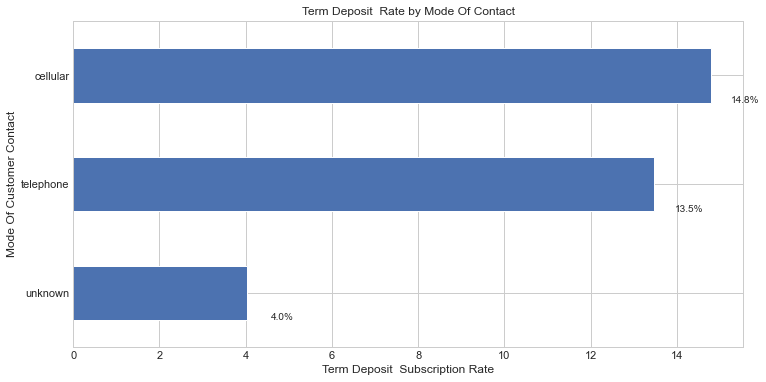

In [46]:
count_modeofcomm_target_pct = pd.crosstab(dataframe['Target'],dataframe['contact']).apply(lambda x: x/x.sum() * 100)
count_modeofcomm_target_pct= count_modeofcomm_target_pct.transpose()

plot_comm_mode = count_modeofcomm_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit  Rate by Mode Of Contact')
plt.xlabel('Term Deposit  Subscription Rate')
plt.ylabel('Mode Of Customer Contact')

# Label each bar
for rec, label in zip(plot_comm_mode.patches, count_modeofcomm_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_comm_mode.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')



Quick Insight : 
      - Out of total customer who opted for Term Deposit  , 15 % of them were converted usng cell phone as mode of contact. which seems to normal and expected
      - Telephine seems to be quite close to mobile and accounts for 13.4 % of Term Deposit  conversion.   

# Impact Of Call Duration On Term Deposit Conversion: 

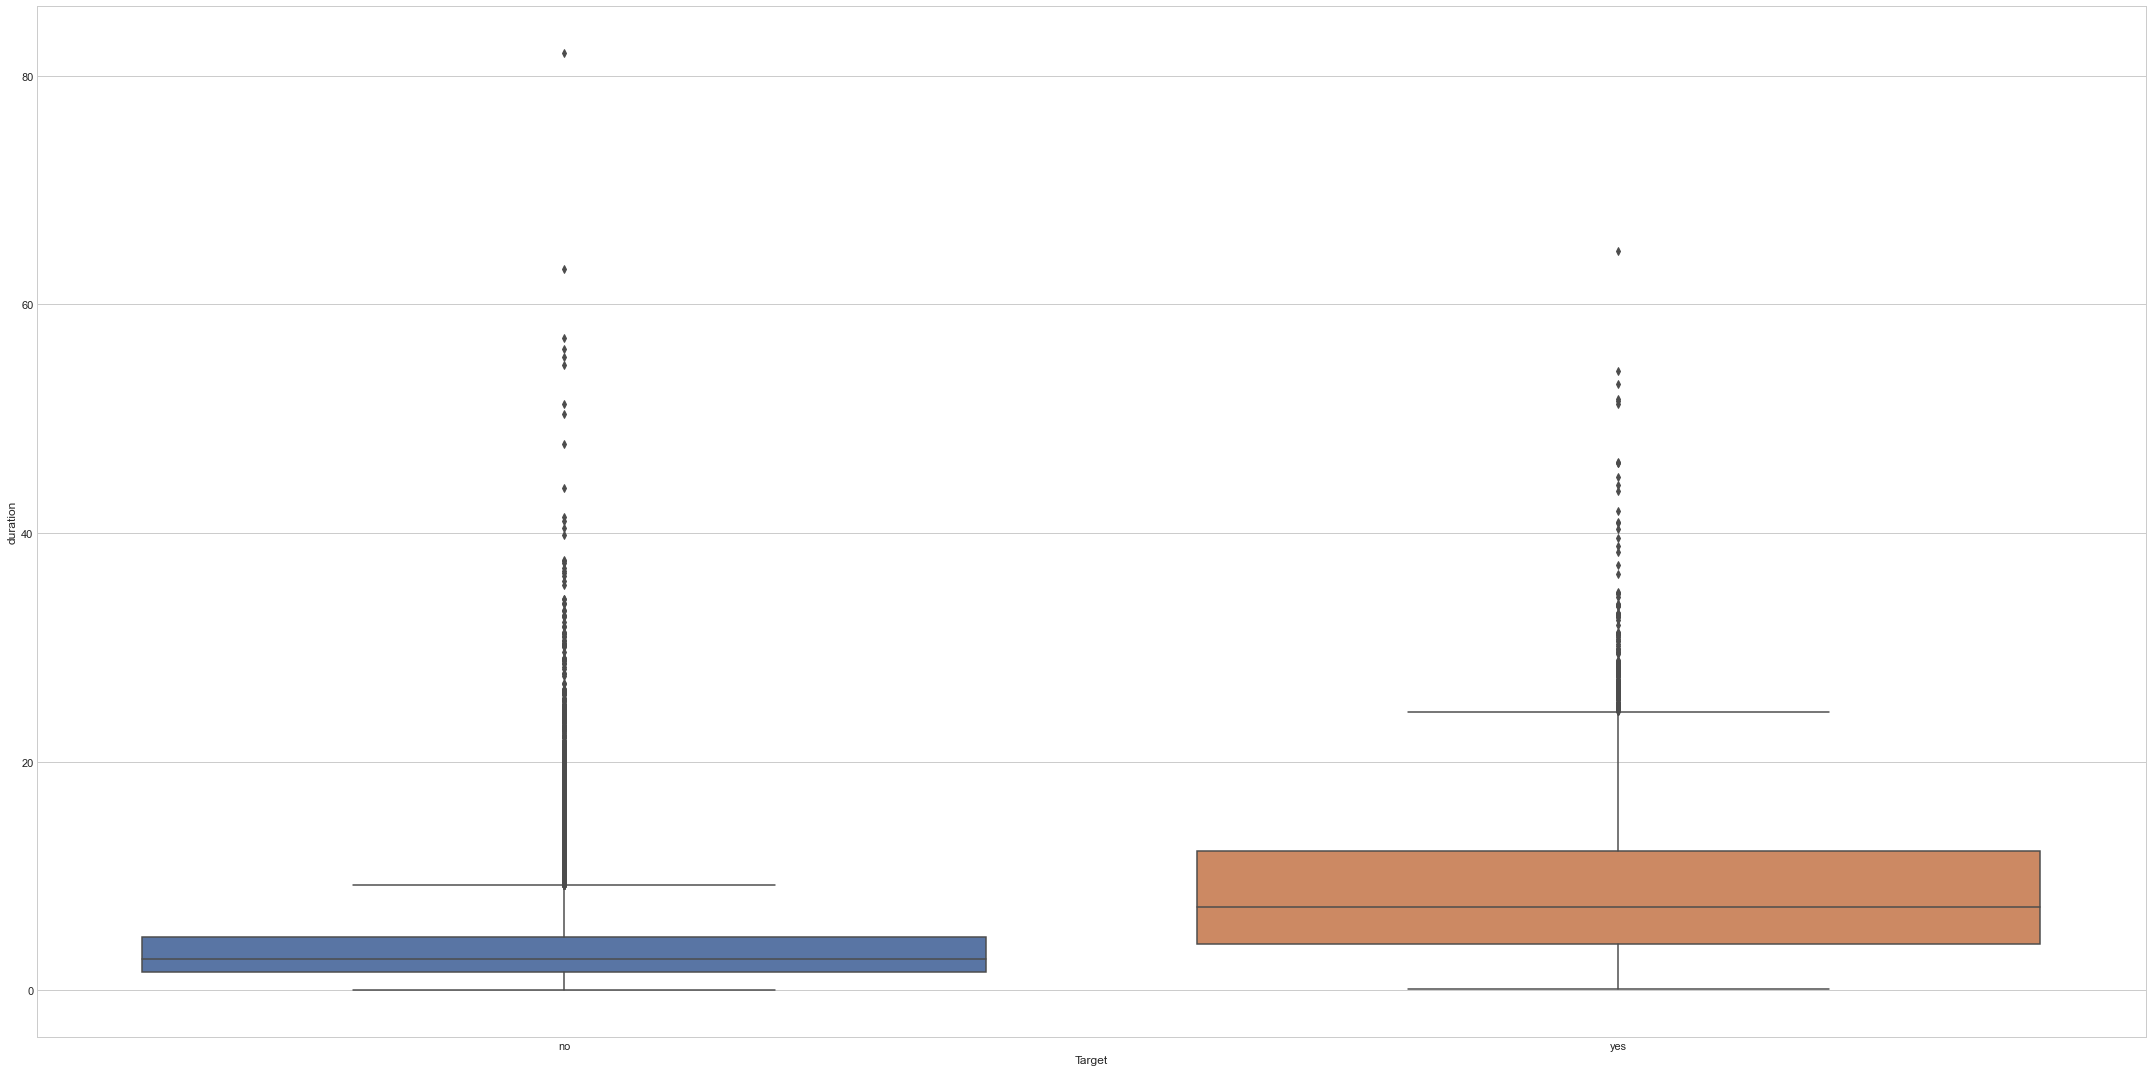

In [47]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(newdf2['Target'], newdf2['duration'], data=dataframe)
plt.tight_layout()

Quick Insight: 
    
    - If the call duration was less than 3-5 minutes customers were less likely to subscribe to Term Deposit  
    - But If the call duration lasted between 5-10 minutes , customers were more likely to take Term Deposit
     

# Term Deposit subscription rate based on last contact month of year

Target         no        yes
month                       
apr     79.776119  20.223881
aug     89.336147  10.663853
dec     53.191489  46.808511
feb     82.478098  17.521902
jan     89.586645  10.413355
jul     91.224996   8.775004
jun     90.210586   9.789414
mar     47.380410  52.619590
may     93.388994   6.611006
nov     89.888238  10.111762
oct     55.539143  44.460857
sep     52.895753  47.104247


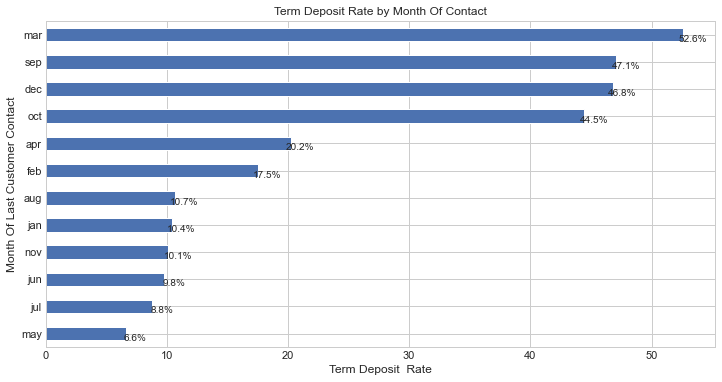

In [48]:
count_monthofcontact_target_pct = pd.crosstab(dataframe['Target'],dataframe['month']).apply(lambda x: x/x.sum() * 100)
count_monthofcontact_target_pct= count_monthofcontact_target_pct.transpose()
print(count_monthofcontact_target_pct)

plot_mnth_contact = count_monthofcontact_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('Term Deposit Rate by Month Of Contact')
plt.xlabel('Term Deposit  Rate')
plt.ylabel('Month Of Last Customer Contact')

# Label each bar
for rec, label in zip(plot_mnth_contact.patches, count_monthofcontact_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_mnth_contact.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')


Quick Insight On Impact of customer contact monthwise on Term Deposit: 
 
 -The highest  Term Deposit subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, and December are over 40%.Clearly, this gives some insights to the bank when to plan their campaign. Having said that they should also count external factor related to weather etc while planning their marketing camapign.


# How Marital Status Impacts Balance Of The Customer

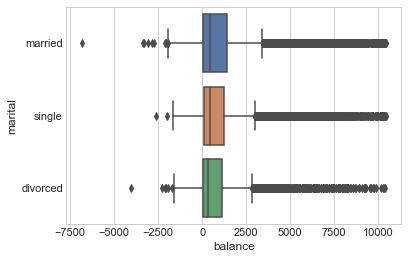

In [49]:
ax = sns.boxplot(newdf2['balance'], newdf2['marital'], data=newdf2)

Quick Insights: 
     - As seen form the box plot above married person have better financial status as compared to single & divorced person. 
     

# Education Impact On  Cutsomer Bank Balance:

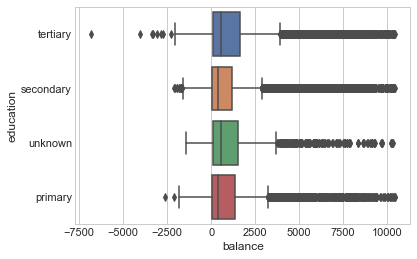

In [50]:
ax = sns.boxplot(newdf2['balance'], newdf2['education'], data=newdf2)

Quick Insight: 
       - The level of education also has a significant impact on the amount of balance a prospect has. As shown above the person with higher education has higher bank balance as compared to promary level educated person.
       - Unknown category whose info is not clear seems to be having more bank balance than primary, this needs to be taken care by bank executive to find the actual education level.
       - There is one interesting observation against people with secondary level eduaction , they seems to have low balance which can be due to the expense they need to plan for higher eduaction. 
       - Also person with higher education level also have more no. of person with negative bank balance with some outlier. 

#  Previous Personal Loan On Bank Balance

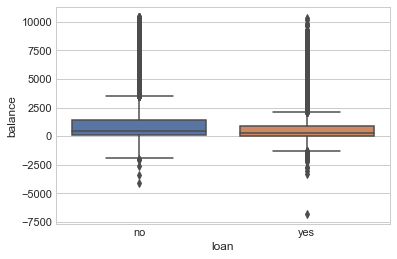

In [51]:
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], data=newdf2)

Insights: 
      - It is clear that person with previous PL seems to be struggling with bank balance as expected
        

# Housing Loan On  Customer Bank Balance

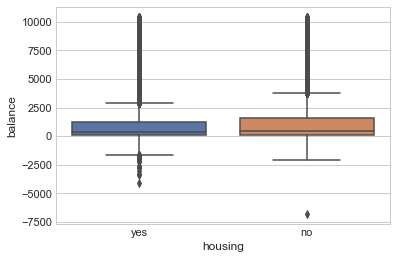

In [52]:
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], data=newdf2)

Quick Insights: 
   - it is clear that person with previous housing loan has low bank balance 

# Let's see default status of the customer impacts the bank balance

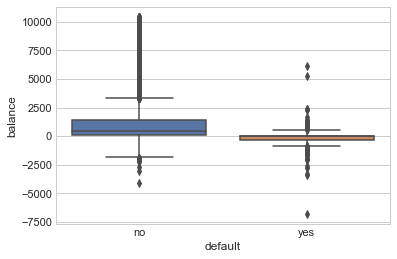

In [53]:
ax = sns.boxplot(newdf2['default'], newdf2['balance'], data=newdf2)

Quick Insight: 
   - it is visible that person with default credit history has bad bank balance. 

# 3.3 Multivariate Analysis: 

#  'duration' & 'campaign': with Target 

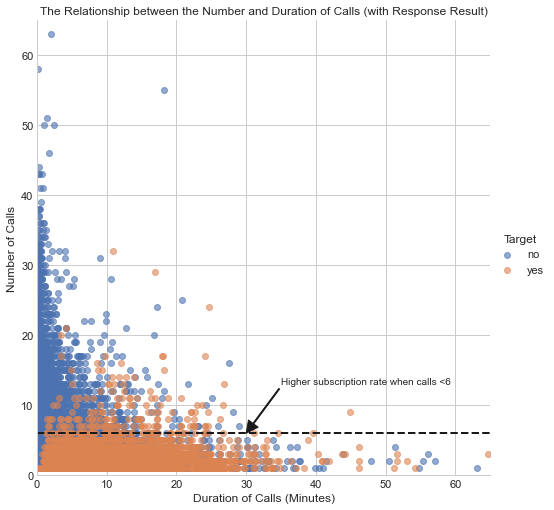

In [54]:
campaign_call_duration = sns.lmplot(x='duration', y='campaign',data = newdf2,hue = 'Target',fit_reg = False, scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=6, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <6',xytext = (35,13),arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

# Let's understand how  the subscription rate get's affected by customer's credit default status & bank balance¶

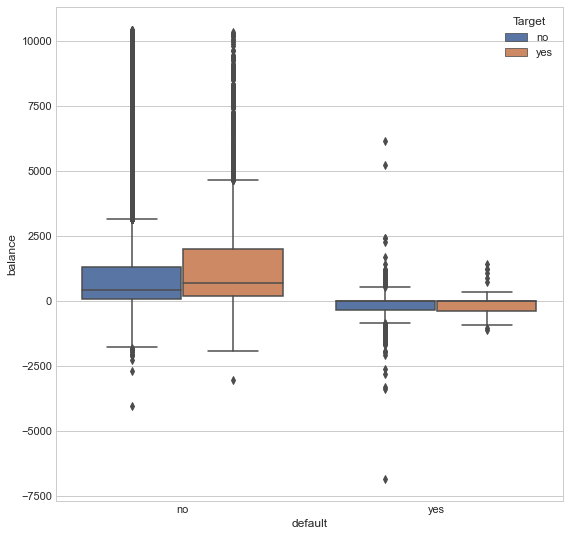

In [55]:
# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['default'], newdf2['balance'], hue = "Target", data=newdf2)


#quick insights:
  - There is clear insight that customers who has not defaulted, have higher average bank balance and more likely to subscribe to Term Deposit
  - The customer with dafult stataus have negative to very low bank balance and are very less likely to avail Term Deposit.
 

# Let's understand how  the subscription rate get's affected by customer's education level & bank balance¶

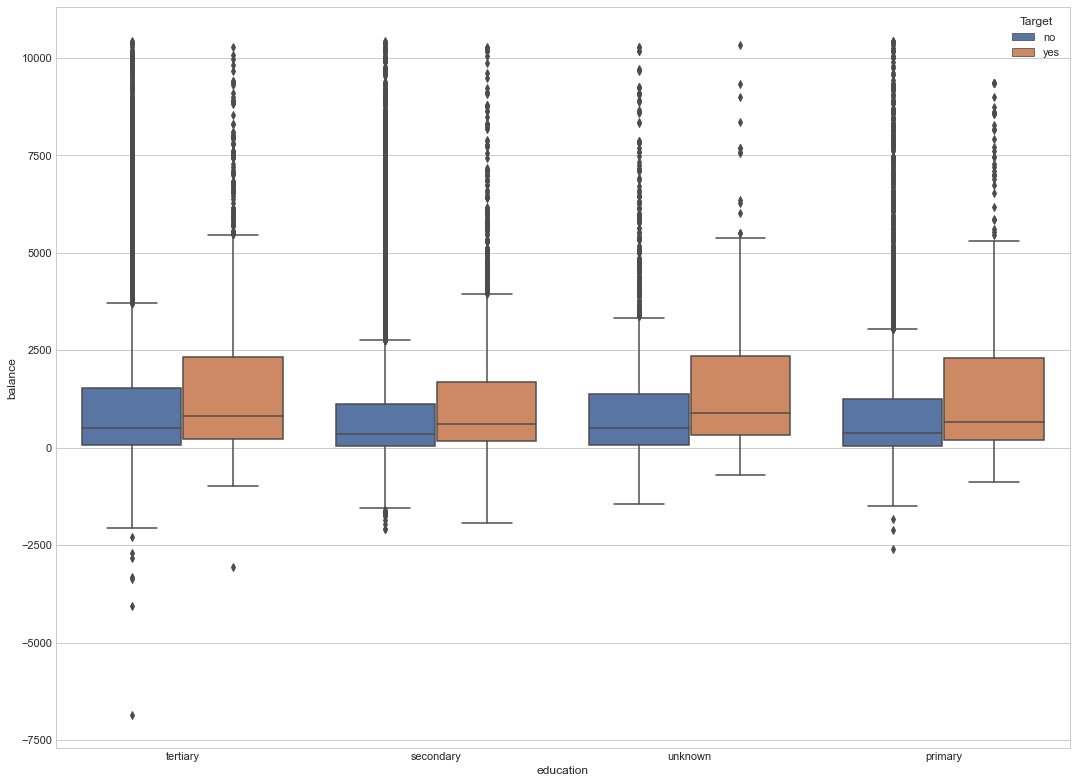

In [56]:
#imapct of job type, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], hue = "Target", data=newdf2)


Quick Insights: 
   - Customers with higher education tends to have higher bank balance and more fd subscription rate, they also have higher number of customers who refused fd option.
   - customers with unknown education level aslo seems to have higher fd subscription and ranks second to tertiary. 
   - Customers with primary level eduaction also tends to have high fd subscription rate clos to tertiary
   - So there seems to be no clear trend here i terms of  how education impacts fd subscription decision.




# Let's understand how  the subscription rate get's affected by customer's Job Type & bank balance¶

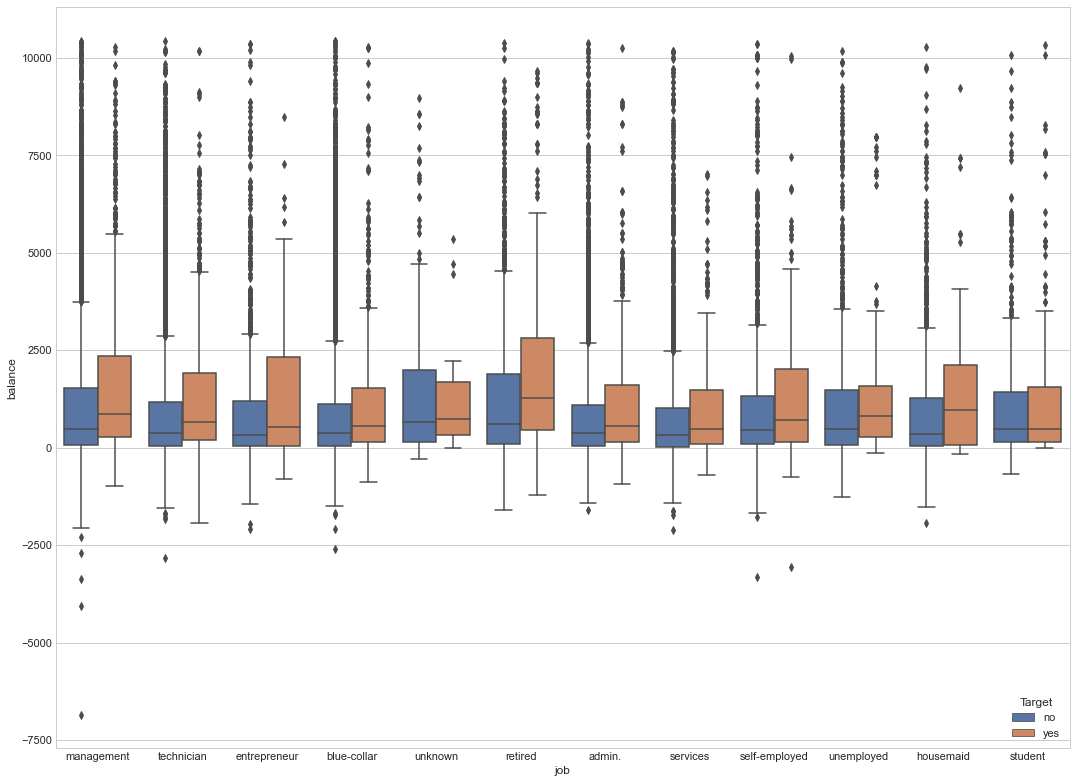

In [57]:
#imapct of education, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['job'], newdf2['balance'], hue = "Target", data=newdf2)



Quick Insights: 
   
     - Customers who are retired seems to have more bank balance and more FD subscription rate.
     -  Management professional seems to have less negative bank balance as compared to retired and also have second highest bank balance and fd  subscription rate
     - student doesn't seems to have negative bank balance ans so is the case with housemaid who seems to have very little negatuve bank balance . 

# Let's understand how  the subscription rate get's affected by customer's marital status & bank balance¶

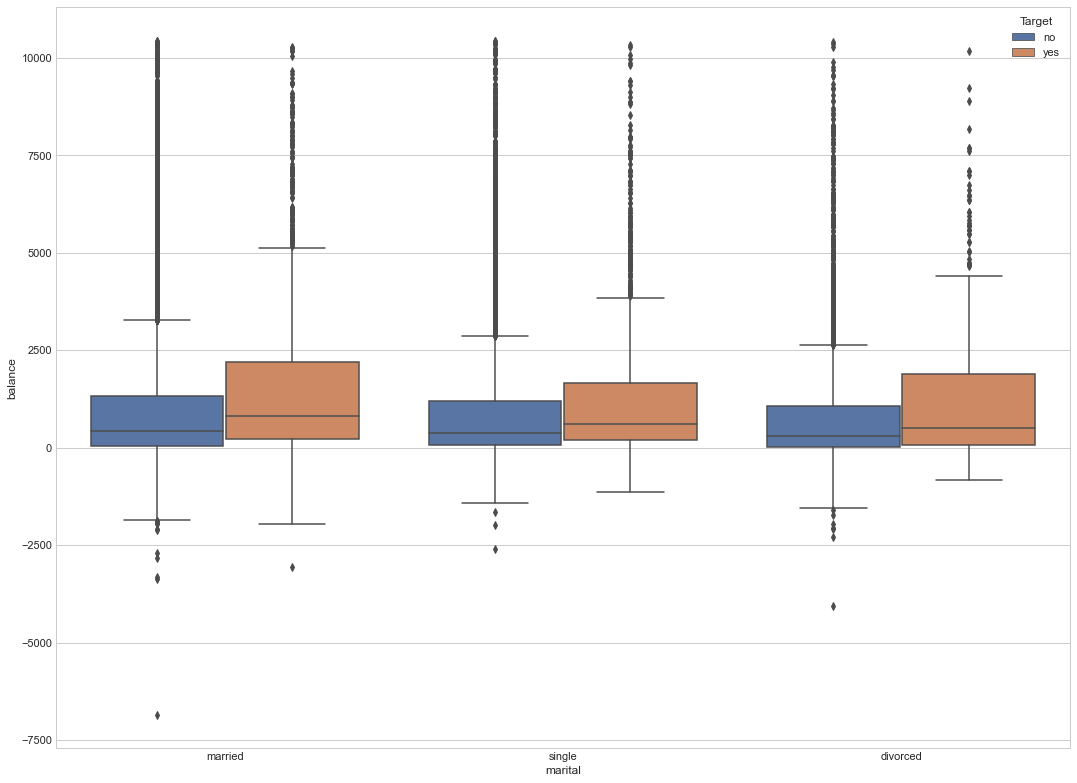

In [58]:
#imapct of marital status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['marital'], newdf2['balance'], hue = "Target", data=newdf2)

Insights: 
  - married customers seems to have higher bank balance and so are more likely to subscriobe to FD. 

# Let's understand how  the subscription rate get's affected by customer's Personal loan status & bank balance¶

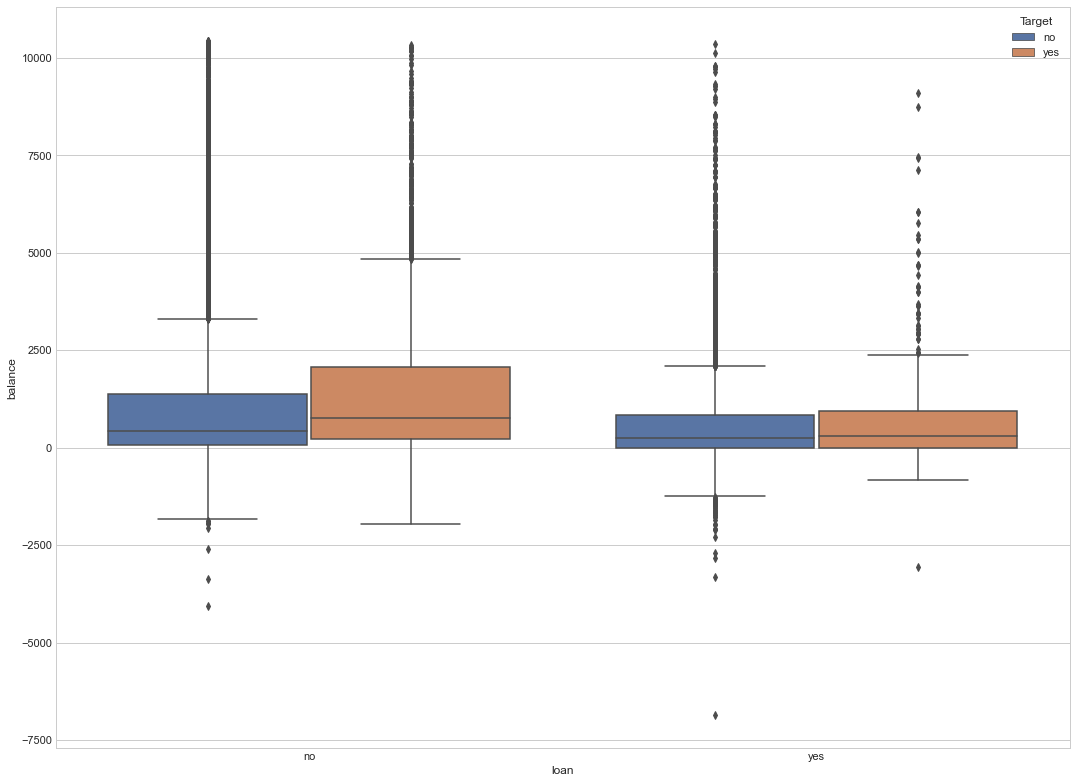

In [59]:
#imapct of personal loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], hue = "Target", data=newdf2)

Insights: customers with no Personal loan seems to have higher bank balance and higer FD subscription rate 

# Let's understand how  the subscription rate get's affected by customer's housing loan status & bank balance¶

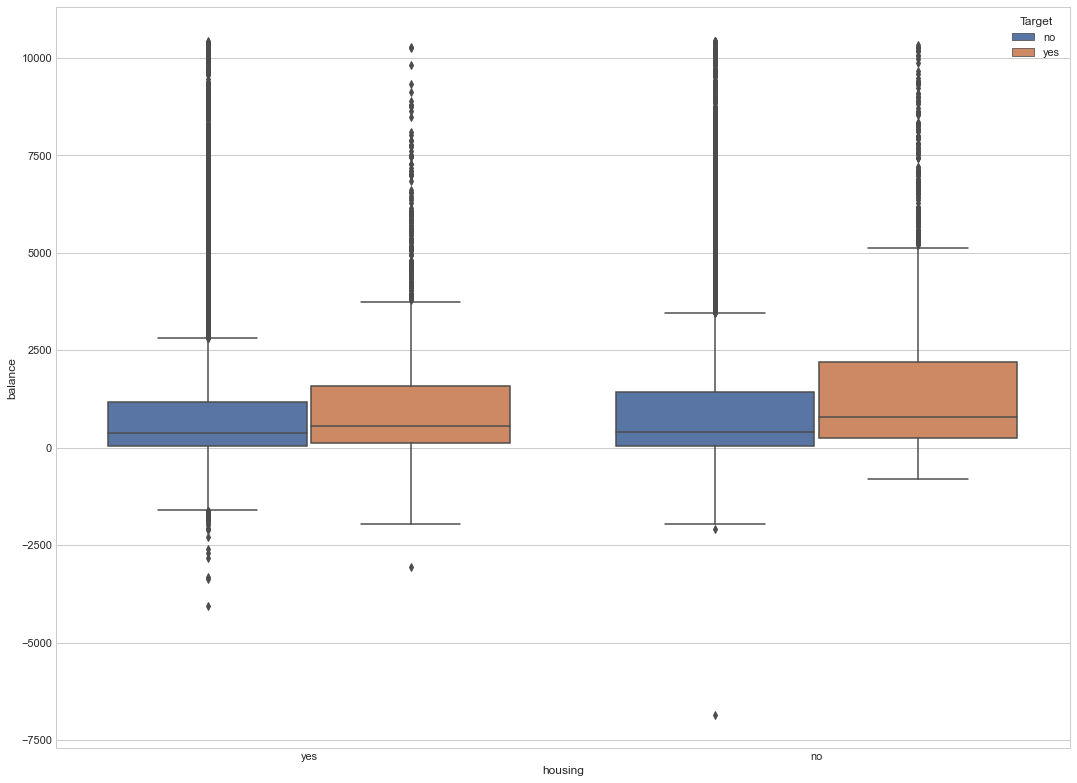

In [60]:
fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], hue = "Target", data=newdf2)

Insights: Customers with no housing loan seems to have higher bank balance and so are more likely to opt for FD. 

# Let's understand how  the subscription rate get's affected by age & bank balance

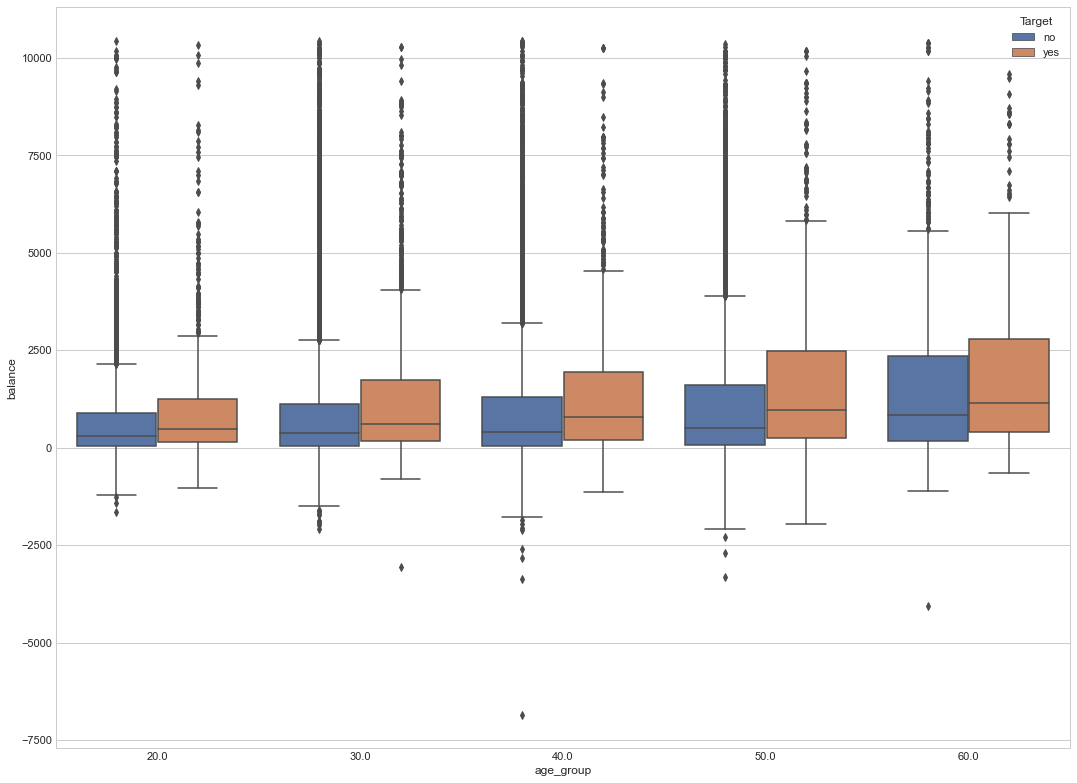

In [61]:
#imapct of contact type, bank balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['age_group'], newdf2['balance'], hue = "Target", data=newdf2)

#imapact of contact type, bank balance on fd suscription.
  - Customers falling in the age gorup of 50-60 & 60-70 seems to have higher FD subscription rate, as they have higher bank balance also. 
  - It seems like as age increases customer are more oriented towards FD as their best saving & investment option.


# Let's understand how  each numerical attributes are correlated to measure their value proposition in building our model going forward

In [62]:
#CORRELATION MATRIX FOR ALL THE NUMERICAL ATTRIBUTES: 
newdf2.corr()
# Let's Change 'month' from words to numbers for easier analysis
lst = [newdf2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
def convert(newdf2, new_column, old_column):
    newdf2[new_column] = newdf2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return newdf2[new_column].value_counts()

Correlation Matrix
                age   balance       day  duration  campaign     pdays  \
age        1.000000  0.105504 -0.010668 -0.006065  0.004580 -0.006096   
balance    0.105504  1.000000  0.009472  0.035930 -0.022389  0.016910   
day       -0.010668  0.009472  1.000000 -0.032867  0.169848 -0.088887   
duration  -0.006065  0.035930 -0.032867  1.000000 -0.083199  0.000179   
campaign   0.004580 -0.022389  0.169848 -0.083199  1.000000 -0.094046   
pdays     -0.006096  0.016910 -0.088887  0.000179 -0.094046  1.000000   
month_int  0.091136  0.096298  0.100088 -0.016775  0.059967 -0.092027   
previous   0.014026  0.038031 -0.055350  0.005694 -0.051426  0.568111   

           month_int  previous  
age         0.091136  0.014026  
balance     0.096298  0.038031  
day         0.100088 -0.055350  
duration   -0.016775  0.005694  
campaign    0.059967 -0.051426  
pdays      -0.092027  0.568111  
month_int   1.000000 -0.022353  
previous   -0.022353  1.000000  


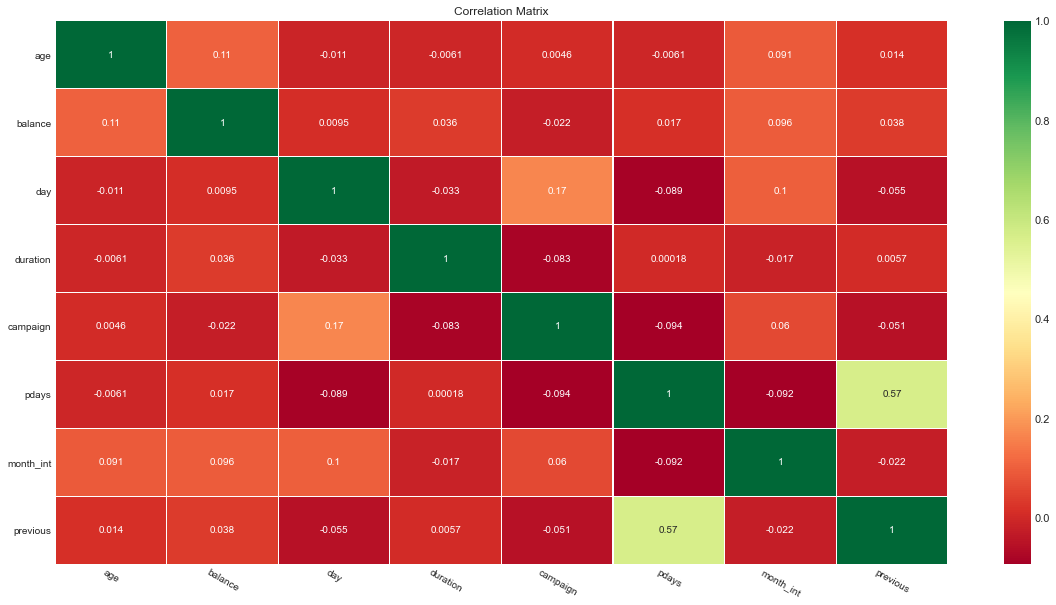

In [63]:
corr_data = newdf2[['age','balance','day','duration','campaign','pdays','month_int', 'previous','Target']]
corr = corr_data.corr()
print("Correlation Matrix")
print(corr)

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


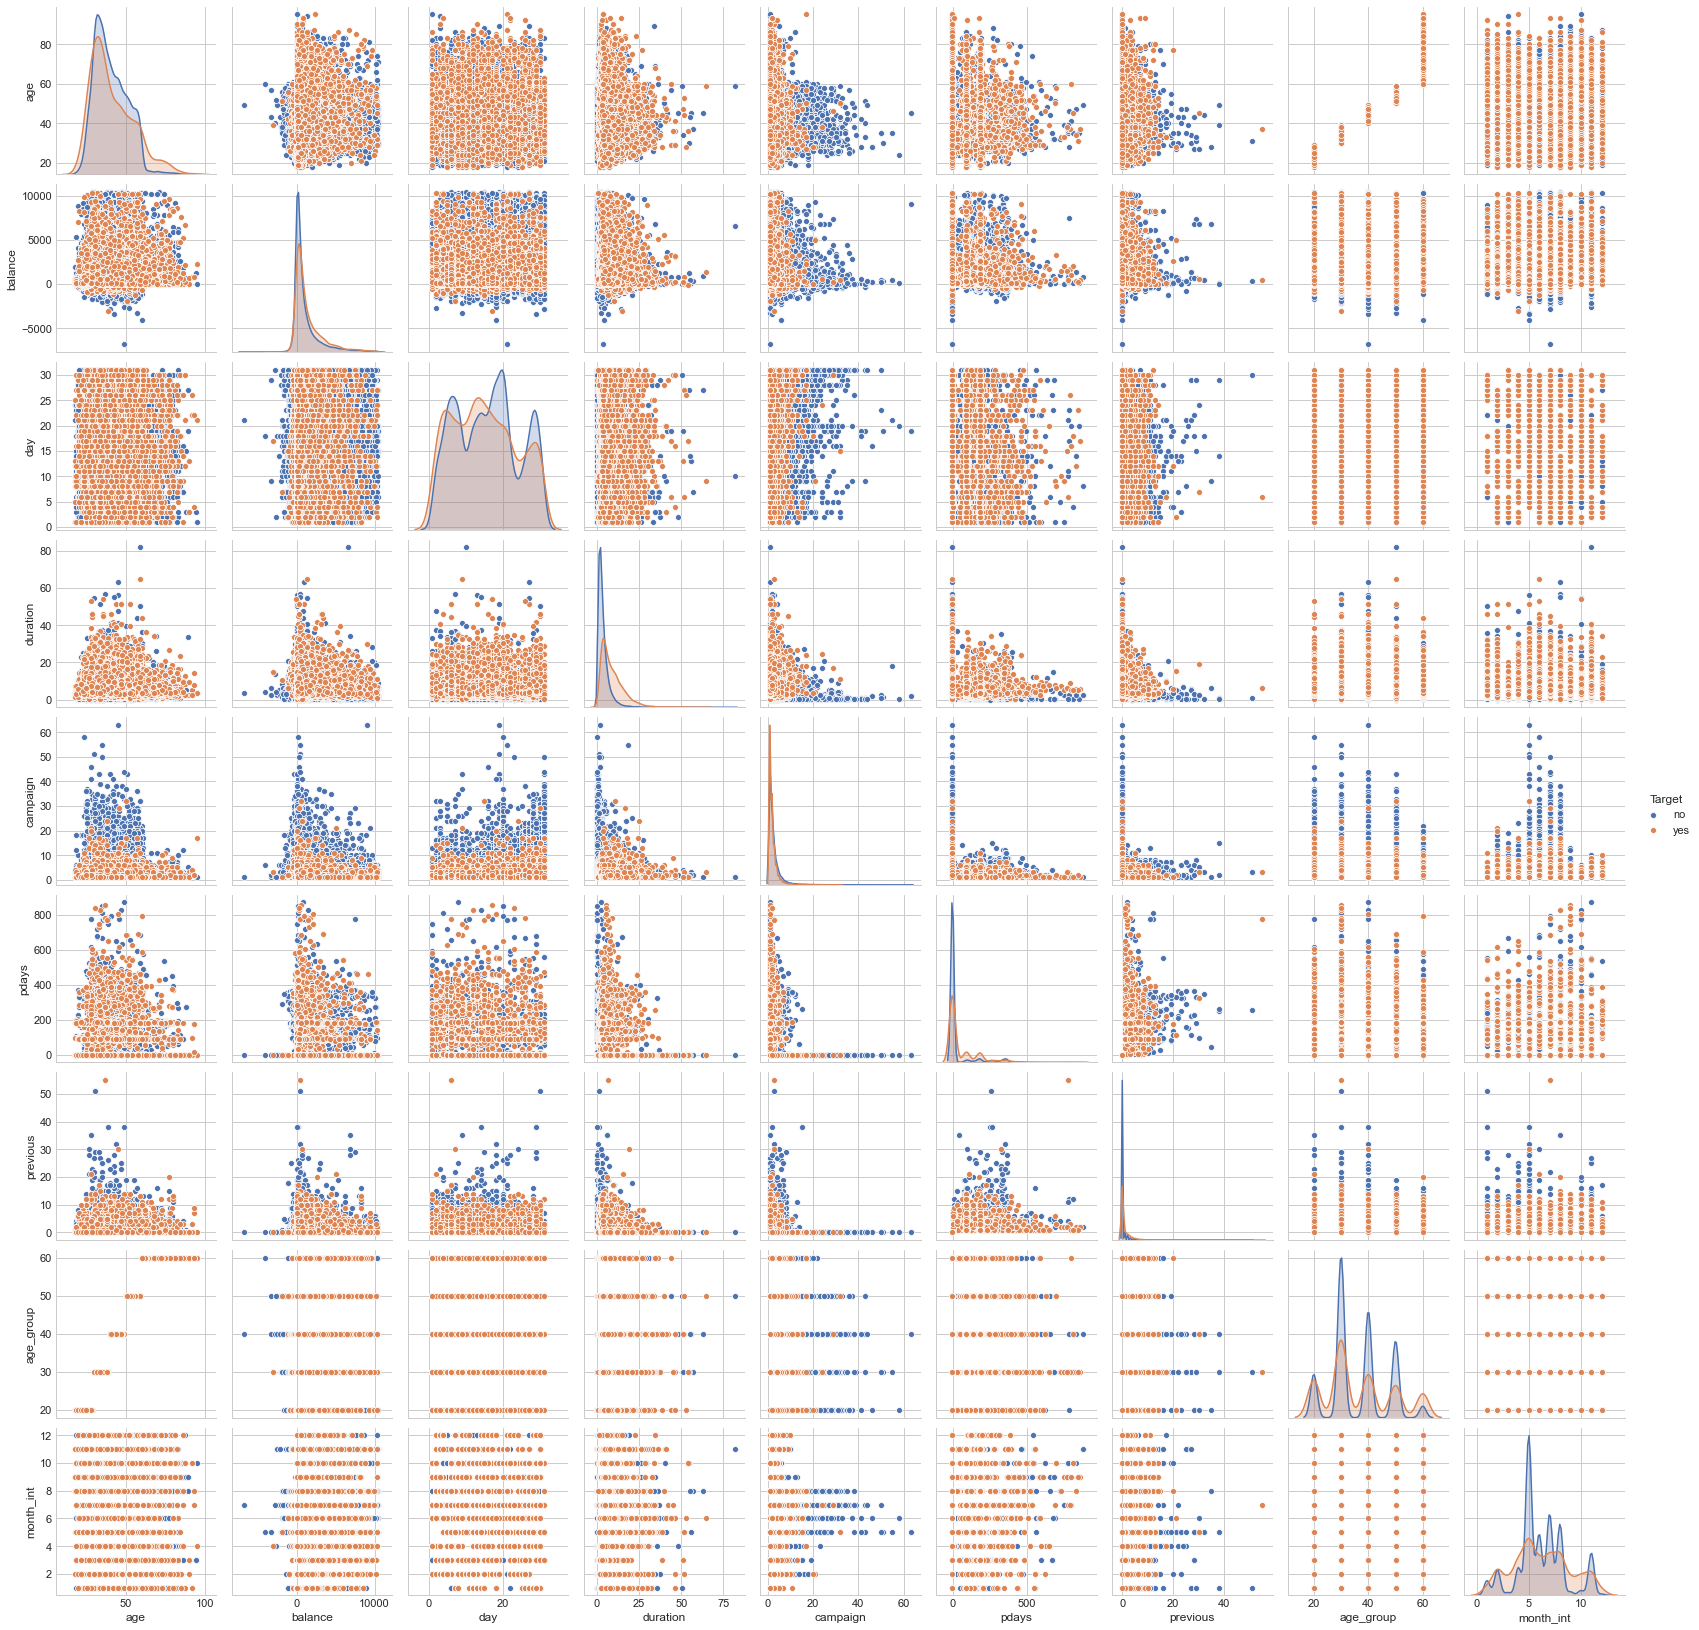

In [64]:
sns.pairplot(newdf2,hue='Target');

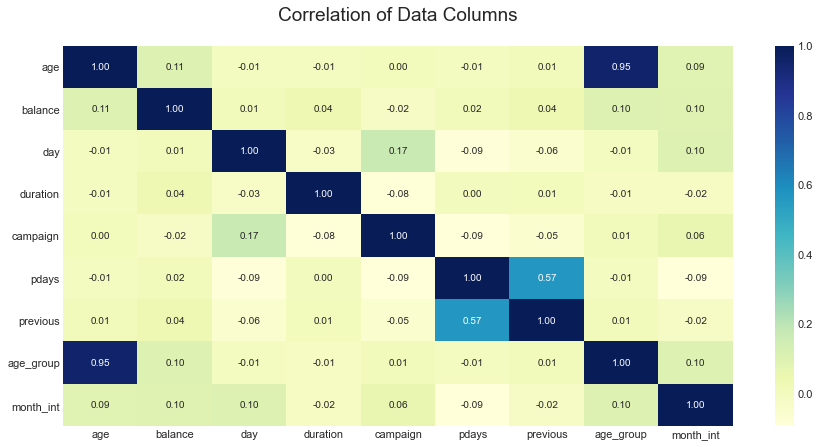

In [65]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Data Columns', y=1.05, size=19)
sns.heatmap(newdf2.corr(), annot=True, fmt='.2f',cmap="YlGnBu")

In [66]:
## Contingency table to get Approved  %
def get_contingency_table(df,target,var):
    ct_res = pd.crosstab(df[var],df[target],margins=True)
    ct_res['Approved (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns=['All'])

In [67]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42655 entries, 0 to 45209
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            42655 non-null  int64  
 1   job            42655 non-null  object 
 2   marital        42655 non-null  object 
 3   education      42655 non-null  object 
 4   default        42655 non-null  object 
 5   balance        42655 non-null  int64  
 6   housing        42655 non-null  object 
 7   loan           42655 non-null  object 
 8   contact        42655 non-null  object 
 9   day            42655 non-null  int64  
 10  month          42655 non-null  object 
 11  duration       42655 non-null  float64
 12  campaign       42655 non-null  int64  
 13  pdays          42655 non-null  int64  
 14  previous       42655 non-null  int64  
 15  poutcome       42655 non-null  object 
 16  Target         42655 non-null  object 
 17  age_group      42655 non-null  float64
 18  balanc

# Deliverable – 2 (Prepare the data for analytics) – (10)

# 1. Removing Any Missing Or Meaningless Values

In [68]:
newdf2.describe().T

count         mean          std     min    25%    50%     75%  \
age        42655.0    40.937123    10.578167    18.0  33.00   39.0    48.0   
balance    42655.0  1079.808416  1717.623768 -6847.0  66.00  425.0  1341.0   
day        42655.0    15.863299     8.329445     1.0   8.00   16.0    21.0   
duration   42655.0     4.302900     4.297468     0.0   1.72    3.0     5.3   
campaign   42655.0     2.778080     3.140560     1.0   1.00    2.0     3.0   
pdays      42655.0    32.210855    90.856368    -1.0  -1.00   -1.0    -1.0   
previous   42655.0     0.434885     1.563589     0.0   0.00    0.0     0.0   
age_group  42655.0    36.322588    10.337713    20.0  30.00   30.0    40.0   
month_int  42655.0     6.159887     2.361072     1.0   5.00    6.0     8.0   

                max  
age           95.00  
balance    10443.00  
day           31.00  
duration      81.97  
campaign      63.00  
pdays        871.00  
previous      55.00  
age_group     60.00  
month_int     12.00

In [69]:
# remove the rows of data which have missing value(s)
#No Null Values ..Below statement not required
newdf2 = newdf2.dropna()

In [70]:
#Let's See below what are the attributes which has some meaningless data which are not adding any vals for building better model
newdf2.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  \
0  unknown    5   may      4.35         1     -1         0  unknown     no   
1  unknown    5   may      2.52         1     -1         0  unknown     no   
2  unknown    5   may      1.27         1     -1         0  unknown     no   
3  unknown    5   may      1.53         1     -1         0  unknown     no   
4  unknown    5   may      3.30         1     -1         0  unknown     no   

   age_group    balance_group  month_int  
0       50.0  average balance        5.0  
1       40.0      low balance        5.0  
2       30.0      low balance        5.0  
3       40.0  average balance        5.0  
4       30.0      low balance        5.0

There are attributes having values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.
     - poutcome has many unknown values which doesn't makes any sense, so we can remove it. 
     - Let's identify and treat them below    

In [71]:
# Step 1: Delete the rows in  column 'poutcome' where it contains 'other'
condition = newdf2.poutcome == 'other'
newdf2.drop(newdf2[condition].index, axis = 0, inplace = True)
newdf2.describe()
                         
                         

age       balance           day      duration     campaign  \
count  42655.000000  42655.000000  42655.000000  42655.000000  42655.00000   
mean      40.937123   1079.808416     15.863299      4.302900      2.77808   
std       10.578167   1717.623768      8.329445      4.297468      3.14056   
min       18.000000  -6847.000000      1.000000      0.000000      1.00000   
25%       33.000000     66.000000      8.000000      1.720000      1.00000   
50%       39.000000    425.000000     16.000000      3.000000      2.00000   
75%       48.000000   1341.000000     21.000000      5.300000      3.00000   
max       95.000000  10443.000000     31.000000     81.970000     63.00000   

              pdays      previous     age_group     month_int  
count  42655.000000  42655.000000  42655.000000  42655.000000  
mean      32.210855      0.434885     36.322588      6.159887  
std       90.856368      1.563589     10.337713      2.361072  
min       -1.000000      0.000000     20.000000      1.000000  
25%       -1.000000      0.000000     30.000000      5.000000  
50%       -1.000000      0.000000     30.000000      6.000000  
75%       -1.000000      0.000000     40.000000      8.000000  
max      871.000000     55.000000     60.000000     12.000000

# Treating Education & Job Column 

In [72]:
for col in newdf2.select_dtypes(include='object').columns:
    print(col)
    print(newdf2[col].unique())


job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'success']
Target
['no' 'yes']
balance_group
['average balance' 'low balance' 'no balance' 'high balance']


As you can see by the ouput of our unique method there are some values like unknown in job & education column. So we can replace them with more meaningful value called other to make some sense.

Let's treat these attributes below:

In [73]:
newdf2[['job','education']] = newdf2[['job','education']].replace(['unknown'],'other')

#Let's See our dataframe & verify if it has been updated
print("\n\nAfter Treatment", newdf2['education'].count)



After Treatment <bound method Series.count of 0         tertiary
1        secondary
2        secondary
3            other
4            other
           ...    
45205    secondary
45206     tertiary
45207      primary
45208    secondary
45209    secondary
Name: education, Length: 42655, dtype: object>


# Let's get rid of contact Column As It has no significant role to play in predicting outcome. 

In [74]:
newdf2['contact'].value_counts() 

cellular     27168
unknown      12820
telephone     2667
Name: contact, dtype: int64

insights:
      - As contact has almost 29 % data which has uknown value it has no significant role to play in predciting the model outcome. 
      - contact type seems to be not so important feature here so we can drop it form the dataframe  

In [75]:
# Drop column "contact" which seems to be not so useful
new_df1 = newdf2.copy()
newdf2.drop('contact', axis=1, inplace = True)
new_df2 = newdf2.copy()

In [76]:
# Let's get rid of  customer values with 'other' in education column as it doesn't make any sense to have such values in making any useful predcition .

logic = (new_df2['education'] == 'other')
new_df2.drop(new_df2[logic].index, axis = 0, inplace = True)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40897 entries, 0 to 45209
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            40897 non-null  int64  
 1   job            40897 non-null  object 
 2   marital        40897 non-null  object 
 3   education      40897 non-null  object 
 4   default        40897 non-null  object 
 5   balance        40897 non-null  int64  
 6   housing        40897 non-null  object 
 7   loan           40897 non-null  object 
 8   day            40897 non-null  int64  
 9   month          40897 non-null  object 
 10  duration       40897 non-null  float64
 11  campaign       40897 non-null  int64  
 12  pdays          40897 non-null  int64  
 13  previous       40897 non-null  int64  
 14  poutcome       40897 non-null  object 
 15  Target         40897 non-null  object 
 16  age_group      40897 non-null  float64
 17  balance_group  40897 non-null  object 
 18  month_

## Transforming All Categorical Column to Numercial Values using encoding

In [77]:
# Function to replace marital values with numercial
def marital_num(df):
    mar= [df]
    for data in mar: 
        data.loc[data['marital'] == "married",  "marital_state"] = 1
        data.loc[data['marital'] == "single",   "marital_state"] = 2
        data.loc[data['marital'] == "divorced", "marital_state"] = 3

#JOB: 
def job_num(df):
    jb= [df]
    for data in jb: 
        data.loc[data['job'] == "management", "Job_state"] = 1
        data.loc[data['job'] == "technician", "Job_state"] = 2
        data.loc[data['job'] == "entrepreneur", "Job_state"] = 3
        data.loc[data['job'] == "blue-collar", "Job_state"] = 4
        data.loc[data['job'] == "retired", "Job_state"] = 5
        data.loc[data['job'] == "admin.", "Job_state"] = 6
        data.loc[data['job'] == "services", "Job_state"] = 7
        data.loc[data['job'] == "self-employed", "Job_state"] = 8
        data.loc[data['job'] == "unemployed", "Job_state"] = 9
        data.loc[data['job'] == "student", "Job_state"] = 10
        data.loc[data['job'] == "housemaid", "Job_state"] = 11
        data.loc[data['job'] == "other", "Job_state"] = 12
        
#Education:

def edu_num(df):
    edu= [df]
    for data in edu: 
        data.loc[data['education'] == "primary", "education_state"] = 1
        data.loc[data['education'] == "secondary",  "education_state"] = 2
        data.loc[data['education'] == "tertiary", "education_state"] = 3
        data.loc[data['education'] == "unknown", "education_state"] = 4
    

#    
def pout_num(df):
    pout= [df]
    for data in pout: 
        data.loc[data['poutcome'] == "failure", "poutcome_state"] = 1
        data.loc[data['poutcome'] == "success",  "poutcome_state"] = 2
        data.loc[data['poutcome'] == "unknown", "poutcome_state"] = 3  
        


In [78]:

marital_num(new_df2)
job_num(new_df2)
edu_num(new_df2)
pout_num(new_df2)

convert(new_df2, "housing_state", "housing")
convert(new_df2, "default_state", "default")
convert(new_df2, "loan_binary", "loan")
convert(new_df2, "Term Deposit Result", "Target")


new_df2.drop(['age','job', 'balance_group','housing','marital', 'default', 'loan', 'housing', 'education', 'month', 'poutcome', 'Target'], axis = 1, inplace = True) 
new_df2

balance  day  duration  campaign  pdays  previous  age_group  \
0         2143    5      4.35         1     -1         0       50.0   
1           29    5      2.52         1     -1         0       40.0   
2            2    5      1.27         1     -1         0       30.0   
5          231    5      2.32         1     -1         0       30.0   
6          447    5      3.62         1     -1         0       20.0   
...        ...  ...       ...       ...    ...       ...        ...   
45205      505   17      6.43         2     -1         0       20.0   
45206      825   17     16.28         3     -1         0       50.0   
45207     1729   17      7.60         2     -1         0       60.0   
45208     5715   17     18.78         5    184         3       60.0   
45209      668   17      8.47         4     -1         0       50.0   

       month_int  marital_state  Job_state  education_state  poutcome_state  \
0            5.0            1.0        1.0              3.0             3.0   
1            5.0            2.0        2.0              2.0             3.0   
2            5.0            1.0        3.0              2.0             3.0   
5            5.0            1.0        1.0              3.0             3.0   
6            5.0            2.0        1.0              3.0             3.0   
...          ...            ...        ...              ...             ...   
45205       11.0            2.0        2.0              2.0             3.0   
45206       11.0            1.0        2.0              3.0             3.0   
45207       11.0            3.0        5.0              1.0             3.0   
45208       11.0            1.0        5.0              2.0             2.0   
45209       11.0            1.0        4.0              2.0             3.0   

       housing_state  default_state  loan_binary  Term Deposit Result  
0                  1              0            0                    0  
1                  1              0            0                    0  
2                  1              0            1                    0  
5                  1              0            0                    0  
6                  1              0            1                    0  
...              ...            ...          ...                  ...  
45205              0              0            1                    1  
45206              0              0            0                    1  
45207              0              0            0                    1  
45208              0              0            0                    1  
45209              0              0            0                    0  

[40897 rows x 16 columns]

In [79]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40897 entries, 0 to 45209
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   balance              40897 non-null  int64  
 1   day                  40897 non-null  int64  
 2   duration             40897 non-null  float64
 3   campaign             40897 non-null  int64  
 4   pdays                40897 non-null  int64  
 5   previous             40897 non-null  int64  
 6   age_group            40897 non-null  float64
 7   month_int            40897 non-null  float64
 8   marital_state        40897 non-null  float64
 9   Job_state            40897 non-null  float64
 10  education_state      40897 non-null  float64
 11  poutcome_state       40897 non-null  float64
 12  housing_state        40897 non-null  int64  
 13  default_state        40897 non-null  int64  
 14  loan_binary          40897 non-null  int64  
 15  Term Deposit Result  40897 non-null 

In [80]:
new_df2['Term Deposit Result'].value_counts()

0    36258
1     4639
Name: Term Deposit Result, dtype: int64

The target column is having high level of imbalance in terms of yes & no distribution with no leading with 88% and yes only with 12%.
This kind of imbalance leads to ambiguity in model accuracy & predcition.We will take care of the data imbalances later on. 

# Let's Create Some Important Functions Which will be used frequently in our model building:


In [81]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Fitting the model

def fit_test_model(model, X_train, y_train, X_test):
    # Train the model
    model.fit(X_train, y_train)
    # Y Hat Prediction on Test Data
    model_pred = model.predict(X_test)
    return model_pred



# Function to calculate Accuracy Score
def model_accuracy_score(model, X_train, y_train, X_test):
    model_pred = fit_test_model(model,X_train, y_train, X_test)
    accu_score = accuracy_score(y_test, model_pred)
    return accu_score


# Calculate Confusion Matrix & PLot To Visualize it

def draw_confmatrix(y_test, yhat, str1, str2):
    cm = confusion_matrix( y_test, yhat, [0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2] , yticklabels = [str1, str2] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



#Print Classification Report Metrics
def classificationreport(y_test, yhat):
    # Make predictions and evalute
    class_report= classification_report(y_test, yhat)
    return class_report 

#Function To plot ROC Curve: For Given Model
def roc_auc_curve(model, X_test,TITLE):
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # Calculating roc_auc score
    rocauc = roc_auc_score(y_test, probs)
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    plt.figure(figsize=(10,10))
    plt.title(TITLE)
    plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % rocauc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
def prec_recall_curve(model,X_train, y_train, X_test, STR):   
    # predict probabilities
    probs = model.predict_proba(X_test)[:,1]
    # predict class values
    yhat = fit_test_model(model,X_train, y_train, X_test)
    #calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    # calculate F1 score
    f1 = f1_score(y_test, yhat)
   #calculate precision-recall AUC
    aucscore = auc(recall, precision)
    # calculate average precision score
    ap = average_precision_score(y_test, probs)
    print('f1=%.3f auc=%.3f ap=%.3f' % (f1, aucscore, ap))
    # plot no skill
    plt.figure(figsize=(10,10))
    plt.title(STR)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    # show the plot
    plt.show()


# Creating two different data sets of dependent and independent attributes


In [82]:
from sklearn.model_selection import train_test_split
array = new_df2.values
X = array[:,0:15]
y = array[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(28627, 15)
(12270, 15)
(28627,)
(12270,)


# Transform the data i.e. scale / normalize 

In [83]:
from sklearn.preprocessing import StandardScaler
#STANDARD Sclaer: 
stdsc= StandardScaler()
X_train3 = pd.DataFrame(stdsc.fit_transform(X_train))
X_test3 = pd.DataFrame(stdsc.transform(X_test))
StdSc_X_train = X_train3
StdSc_X_test = X_test3


In [84]:
StdSc_X_train.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

# Deliverable – 3 (create the ensemble model) – (30)


# 1. Logistic Model    

In [85]:
#Build the logistic regression model
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(X_train3))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.263884
         Iterations 8


In [86]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())
print(lg.summary2())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                28627
Model:                          Logit   Df Residuals:                    28611
Method:                           MLE   Df Model:                           15
Date:                Thu, 08 Oct 2020   Pseudo R-squ.:                  0.2485
Time:                        22:27:38   Log-Likelihood:                -7554.2
converged:                       True   LL-Null:                       -10053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6802      0.029    -93.882      0.000      -2.736      -2.624
0              0.1257      0.020      6.442      0.000       0.087       0.164
1             -0.0550      0.022     -2.509      0.0

In [87]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [88]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
2      1.01        2.73         0.73  0.00
4      0.29        1.34         0.57  0.00
5      0.22        1.25         0.56  0.00
10     0.20        1.23         0.55  0.00
0      0.13        1.13         0.53  0.00
8      0.10        1.11         0.53  0.00
9      0.06        1.06         0.51  0.01
1     -0.06        0.95         0.49  0.01
14    -0.25        0.78         0.44  0.00
3     -0.45        0.64         0.39  0.00
12    -0.61        0.54         0.35  0.00
const -2.68        0.07         0.06  0.00

In [89]:
def draw_confmatrix(y_test, yhat, str1, str2):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1] )
    print("Confusion Matrix Is:", cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2] , yticklabels = [str1, str2] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy Score Is :  0.893398533007335
LogisticRegression F1 score = 0.3353658536585366
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     10844
         1.0       0.61      0.23      0.34      1426

    accuracy                           0.89     12270
   macro avg       0.76      0.61      0.64     12270
weighted avg       0.87      0.89      0.87     12270

Confusion Matrix Is: [[10632   212]
 [ 1096   330]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


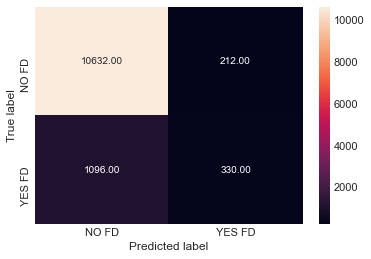

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.9038304808475958
DecisionTreeClassifier F1 score = 0.4755555555555555
DecisionTreeClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     10844
         1.0       0.65      0.38      0.48      1426

    accuracy                           0.90     12270
   macro avg       0.79      0.67      0.71     12270
weighted avg       0.89      0.90      0.89     12270

Confusion Matrix Is: [[10555   289]
 [  891   535]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


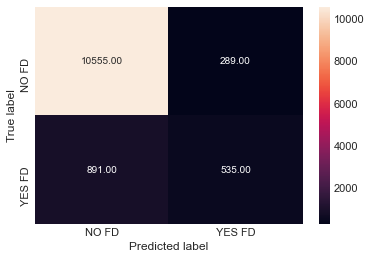

Confusion Matrix HeatMap :  None
Accuracy Score Is :  0.9042379788101059
RandomForestClassifier F1 score = 0.4632252169940612
RandomForestClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10844
         1.0       0.66      0.36      0.46      1426

    accuracy                           0.90     12270
   macro avg       0.79      0.67      0.71     12270
weighted avg       0.89      0.90      0.89     12270

Confusion Matrix Is: [[10588   256]
 [  919   507]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


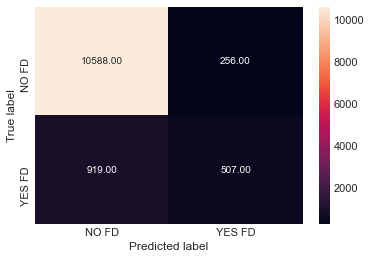

Confusion Matrix HeatMap :  None


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer 

lr = LogisticRegression()
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
rfc = RandomForestClassifier(n_estimators=40)


def scorer(i,j,l):
    for every in (i,j,l):
        every.fit(StdSc_X_train,y_train)
        yhat= every.predict(StdSc_X_test)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(every.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(every.__class__.__name__, 'classification Score =','\n', classification_report(y_test,yhat))
        print("Confusion Matrix HeatMap : ",draw_confmatrix(y_test, yhat, "NO FD", "YES FD"))
        
scorer (lr,dtree,rfc)



##  Confusion Matrix:


Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.


True Negatives : This is the number of correctly classifications of the "No" class or potenial clients that are not willing to  a term deposit.


False Negatives : This is the number of incorrectly classifications of the "No" class or potential clients that are not willing to  a term depositt.


False Positives : This is the number of incorrectly classifications of the "Yes" class or potential clients that are willing to  a term deposit.


True Positives : This is the number of correctly classifications of the "Yes" class or potenial clients that are willing to  a term deposit.

# Our Objective : 

Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio. 


precision the number of true positives divided by the total number of elements labeled as belonging to the positive class 

Recall in this context is defined as the number of true positives divided by the total number of elements that actually belong to the positive class 


In our given objective  

####  itis be great to have high recall value, which will lead to low precision. 

#### We need to consider f1 score which is a kind of trade off between precision & recall being the harmonic mean of both. 

With this concept let's comapre our metrics and find the best model based on confusion matrix. 

# Selecting the base model based on precision, recall, f1 score: 

 based on our confusion matrix & classification report of precison , recall , f1 and accuracy score :
 
# Decision tree seems to fare well compared to Logistic Regression
 
 


## Let's Further Analyse our classification models using roc-auc curve & score 

In [91]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=4)
DT.fit(StdSc_X_train, y_train)
LogReg = LogisticRegression()
LogReg.fit(StdSc_X_train, y_train)


LogisticRegression()

None
None


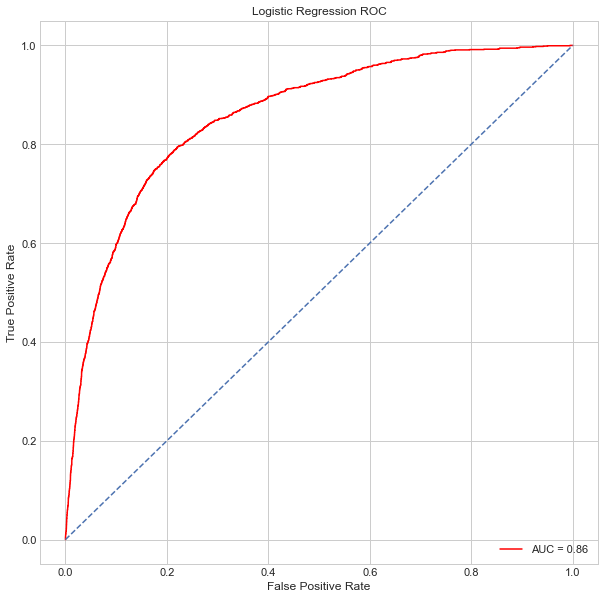

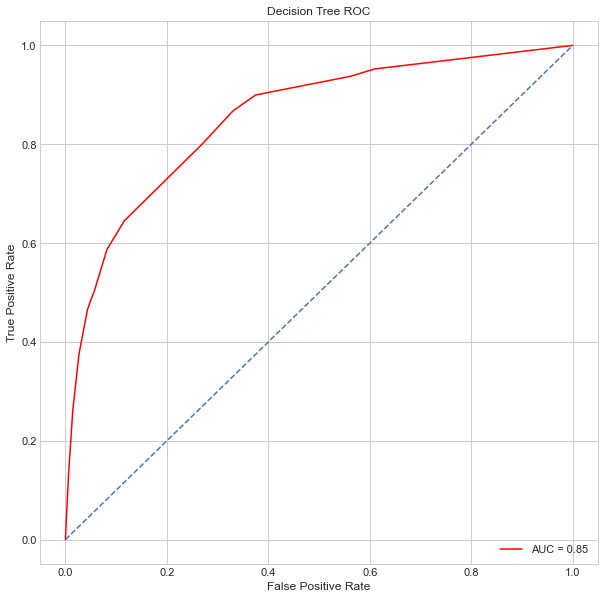

In [92]:
#roc_auc_curve()
print(roc_auc_curve(LogReg, StdSc_X_test, "Logistic Regression ROC"))
print(roc_auc_curve(DT, StdSc_X_test,"Decision Tree ROC"))

# Precision-Recall Curve: For More Balanced Analysis Considering our data is imbalanced.


f1=0.335 auc=0.465 ap=0.465


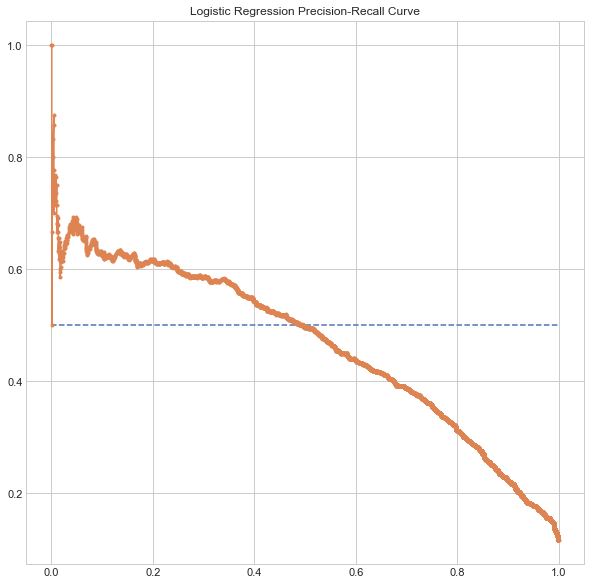

None
f1=0.476 auc=0.517 ap=0.486


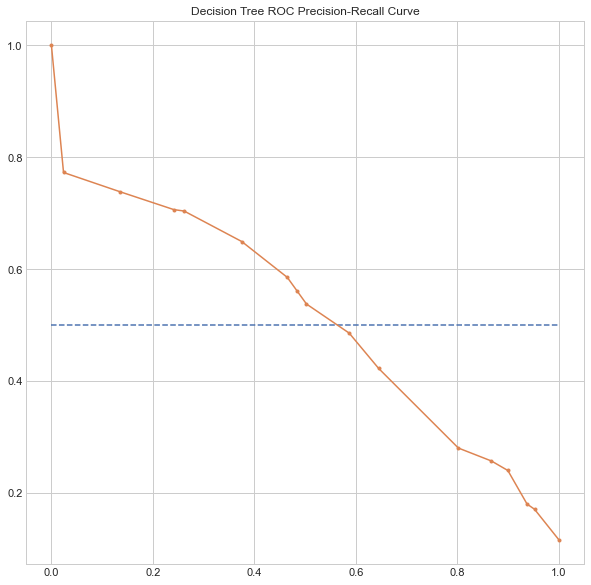

None


In [93]:
#roc_auc_curve()
#prec_recall_curve(model,X_train, y_train, X_test, STR)
print(prec_recall_curve(LogReg,StdSc_X_train, y_train, StdSc_X_test, "Logistic Regression Precision-Recall Curve"))
print(prec_recall_curve(DT, StdSc_X_train, y_train, StdSc_X_test,"Decision Tree ROC Precision-Recall Curve"))

# Let's Build Model Using Ensemble Techniques: On Imbalanced Data

#Let's see how the committe based model building algo will perform compared to individual models we ananlysed before.

# 1.0 Using RandomForest Classifier: 

Confusion Matrix Is: [[10578   266]
 [  895   531]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


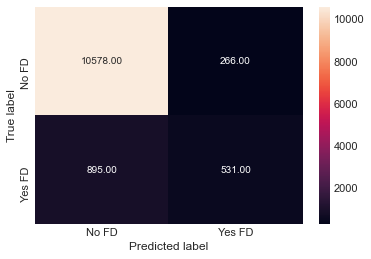

RFC Accuracy Score: 91.0
RFC F1 Score  0.47773279352226716
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     10844
         1.0       0.67      0.37      0.48      1426

    accuracy                           0.91     12270
   macro avg       0.79      0.67      0.71     12270
weighted avg       0.89      0.91      0.89     12270



In [94]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
rfc = RandomForestClassifier(criterion='gini', n_estimators = 1000)
rfc.fit(StdSc_X_train, y_train)
rfcpred = rfc.predict(StdSc_X_test)
draw_confmatrix(y_test, rfcpred,"No FD", "Yes FD")
print("RFC Accuracy Score:",round(accuracy_score(y_test, rfcpred),2)*100)
print("RFC F1 Score ",f1_score(y_test, rfcpred))
print(classificationreport(y_test,rfcpred))

# Quick Insights Based On Confusion Matrix:

Based on  F1 score, accuracy score and recall score , random forrestor seems to be better

Let's further anaylse how RFC fares in roc-auc curve/score and precision-recall curve. 


# ROC Curve For RandomForres Classifier

None


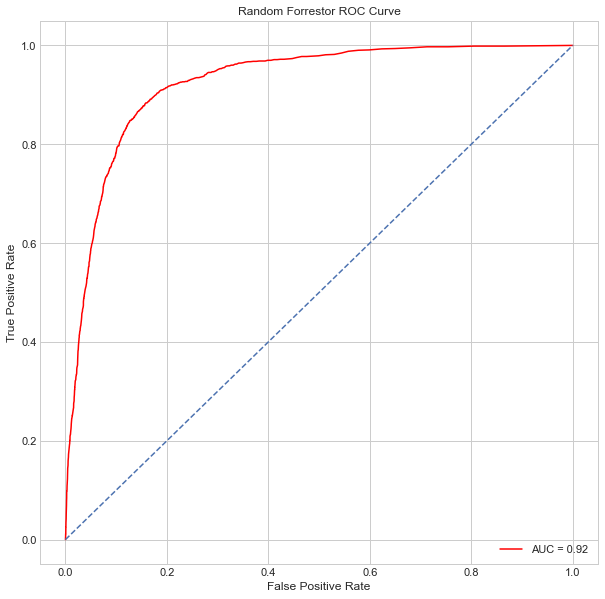

In [95]:
print(roc_auc_curve(rfc, StdSc_X_test, "Random Forrestor ROC Curve"))

# Precision-Recall Curve For RandomForrestor

f1=0.481 auc=0.610 ap=0.610


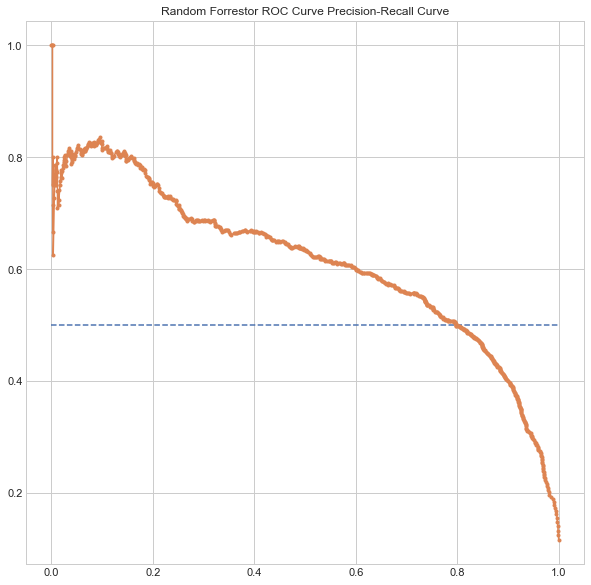

None


In [96]:

print(prec_recall_curve(rfc,StdSc_X_train, y_train, StdSc_X_test, "Random Forrestor ROC Curve Precision-Recall Curve"))

Quick Insights From RFC : Roc & Precision Recall Curve: 
         - Random forrestor performed much better in terms of area covered under the curve with an auc score of 92 %, which is much better than the decision tree and other individual classification model we compared above

Confusion Matrix Is: [[10522   322]
 [  887   539]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


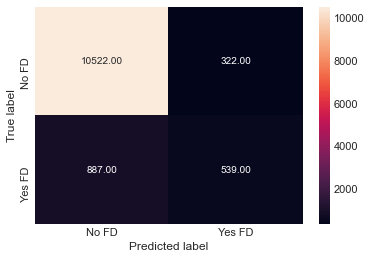

Adaboost Accuracy Score: 90.0
Adaboost F1 Score  0.4713598600787057
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95     10844
         1.0       0.63      0.38      0.47      1426

    accuracy                           0.90     12270
   macro avg       0.77      0.67      0.71     12270
weighted avg       0.89      0.90      0.89     12270

[[10522   322]
 [  887   539]]
90.0


In [97]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
ada = AdaBoostClassifier( n_estimators= 1000)
ada = ada.fit(StdSc_X_train, y_train)
ada_pred = ada.predict(StdSc_X_test)

draw_confmatrix(y_test, ada_pred,"No FD", "Yes FD")
print("Adaboost Accuracy Score:",round(accuracy_score(y_test, ada_pred),2)*100)
print("Adaboost F1 Score ",f1_score(y_test, ada_pred))
print(classificationreport(y_test,ada_pred))

print(confusion_matrix(y_test, ada_pred ))
print(round(accuracy_score(y_test, ada_pred),2)*100)



# ROC Curve & Precision Recall Curve Of Adaboost 

None


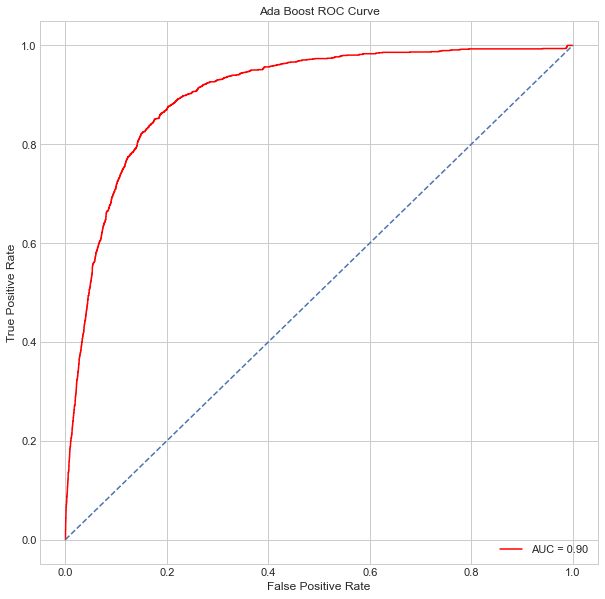

In [98]:
print(roc_auc_curve(ada, StdSc_X_test, "Ada Boost ROC Curve"))

f1=0.471 auc=0.568 ap=0.568


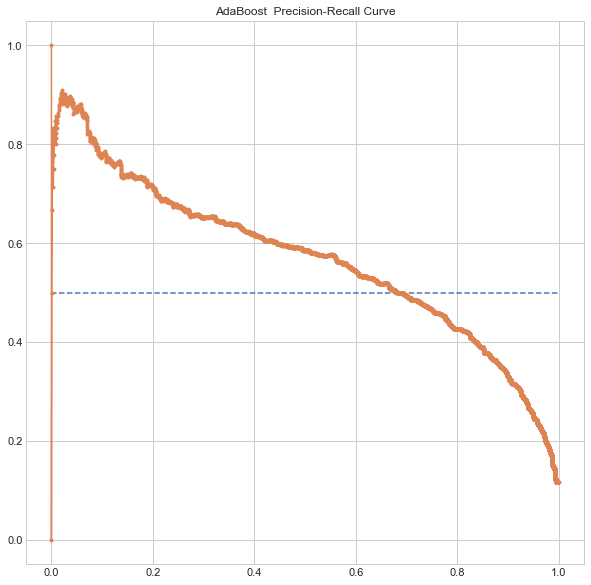

None


In [99]:
print(prec_recall_curve(ada, StdSc_X_train, y_train, StdSc_X_test, "AdaBoost  Precision-Recall Curve"))

Confusion Matrix Is: [[10476   368]
 [  785   641]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


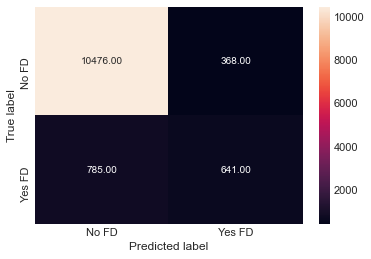

GBFC Accuracy Score: 91.0
GBFC F1 Score  0.5264887063655032
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     10844
         1.0       0.64      0.45      0.53      1426

    accuracy                           0.91     12270
   macro avg       0.78      0.71      0.74     12270
weighted avg       0.90      0.91      0.90     12270

[[10476   368]
 [  785   641]]
91.0


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
Gfc = GradientBoostingClassifier( n_estimators= 1000)
Gfc = Gfc.fit(StdSc_X_train, y_train)
gfc_pred = Gfc.predict(StdSc_X_test)

draw_confmatrix(y_test, gfc_pred,"No FD", "Yes FD")
print("GBFC Accuracy Score:",round(accuracy_score(y_test, gfc_pred),2)*100)
print("GBFC F1 Score ",f1_score(y_test, gfc_pred))
print(classificationreport(y_test,gfc_pred))

print(confusion_matrix(y_test, gfc_pred ))
print(round(accuracy_score(y_test, gfc_pred),2)*100)


# ROC Curve & Precision Recall Curve Of GBC

None


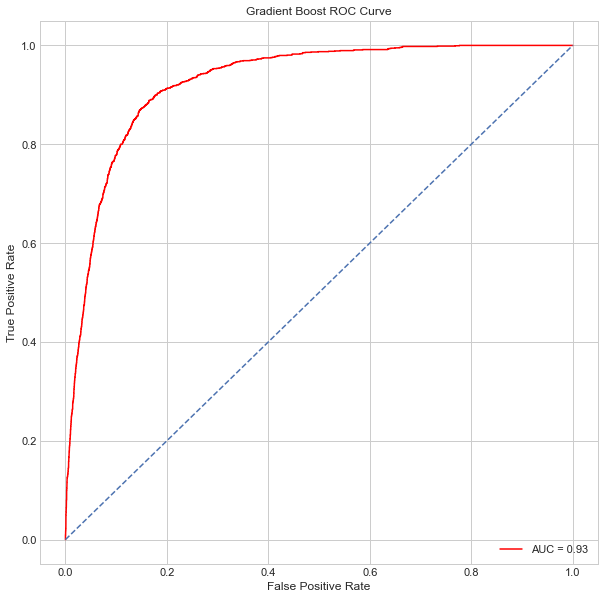

In [101]:
print(roc_auc_curve(Gfc, StdSc_X_test, "Gradient Boost ROC Curve"))


f1=0.527 auc=0.612 ap=0.612


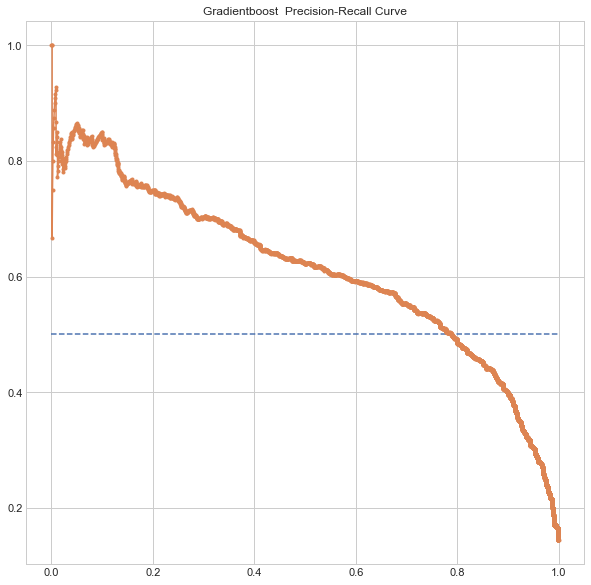

None


In [102]:
print(prec_recall_curve(Gfc,StdSc_X_train, y_train, StdSc_X_test, "Gradientboost  Precision-Recall Curve"))

---------------------------------------------

---------------------------------------------

In [103]:
clf_pruned = LogisticRegression()
clf_pruned = clf_pruned.fit(StdSc_X_train, y_train)
pred_RF= clf_pruned.predict(StdSc_X_test)
#f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
tempResultsDf = pd.DataFrame({'Method':['LogisticRegression'], 
                              'accuracy':[accuracy_score(y_test, pred_RF)],
                              'f1':[f1_score(y_test,pred_RF)],
                              'precision_score':[precision_score(y_test,pred_RF)],
                              'recall_score':[recall_score(y_test,pred_RF)],
                              'roc_auc_score':[roc_auc_score(y_test,pred_RF)]})
resultsDf = pd.concat([tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','f1','precision_score', 'recall_score', 'roc_auc_score']]
resultsDf

Method  accuracy   f1  precision_score  recall_score  \
0  LogisticRegression      0.89 0.34             0.61          0.23   

   roc_auc_score  
0           0.61

In [104]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned = clf_pruned.fit(StdSc_X_train, y_train)
pred_RF= clf_pruned.predict(StdSc_X_test)
#f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
tempResultsDf = pd.DataFrame({'Method':['DecisionTreeClassifier'], 
                              'accuracy':[accuracy_score(y_test, pred_RF)],
                              'f1':[f1_score(y_test,pred_RF)],
                              'precision_score':[precision_score(y_test,pred_RF)],
                              'recall_score':[recall_score(y_test,pred_RF)],
                              'roc_auc_score':[roc_auc_score(y_test,pred_RF)]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','f1','precision_score', 'recall_score', 'roc_auc_score']]
resultsDf

Method  accuracy   f1  precision_score  recall_score  \
0      LogisticRegression      0.89 0.34             0.61          0.23   
0  DecisionTreeClassifier      0.90 0.44             0.59          0.35   

   roc_auc_score  
0           0.61  
0           0.66

In [105]:
new_df2.head()

balance  day  duration  campaign  pdays  previous  age_group  month_int  \
0     2143    5      4.35         1     -1         0      50.00       5.00   
1       29    5      2.52         1     -1         0      40.00       5.00   
2        2    5      1.27         1     -1         0      30.00       5.00   
5      231    5      2.32         1     -1         0      30.00       5.00   
6      447    5      3.62         1     -1         0      20.00       5.00   

   marital_state  Job_state  education_state  poutcome_state  housing_state  \
0           1.00       1.00             3.00            3.00              1   
1           2.00       2.00             2.00            3.00              1   
2           1.00       3.00             2.00            3.00              1   
5           1.00       1.00             3.00            3.00              1   
6           2.00       1.00             3.00            3.00              1   

   default_state  loan_binary  Term Deposit Result  
0              0            0                    0  
1              0            0                    0  
2              0            1                    0  
5              0            0                    0  
6              0            1                    0

In [106]:
## Calculating feature importance

xvar = new_df2.drop('Term Deposit Result', axis=1)
feature_cols = xvar.columns
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
duration        0.55
poutcome_state  0.17
previous        0.17
housing_state   0.09
pdays           0.02
balance         0.00
day             0.00
campaign        0.00
age_group       0.00
month_int       0.00
marital_state   0.00
Job_state       0.00
education_state 0.00
default_state   0.00
loan_binary     0.00

In [107]:
clf_pruned = RandomForestClassifier(n_estimators = 10, random_state=15)
clf_pruned = clf_pruned.fit(StdSc_X_train, y_train)
pred_RF= clf_pruned.predict(StdSc_X_test)
#f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
tempResultsDf = pd.DataFrame({'Method':['RandomForestClassifier'], 
                              'accuracy':[accuracy_score(y_test, rfcpred)],
                              'f1':[f1_score(y_test,rfcpred)],
                              'precision_score':[precision_score(y_test,rfcpred)],
                              'recall_score':[recall_score(y_test,rfcpred)],
                              'roc_auc_score':[roc_auc_score(y_test,rfcpred)]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','f1','precision_score', 'recall_score', 'roc_auc_score']]
resultsDf

Method  accuracy   f1  precision_score  recall_score  \
0      LogisticRegression      0.89 0.34             0.61          0.23   
0  DecisionTreeClassifier      0.90 0.44             0.59          0.35   
0  RandomForestClassifier      0.91 0.48             0.67          0.37   

   roc_auc_score  
0           0.61  
0           0.66  
0           0.67

In [108]:
tempResultsDf = pd.DataFrame({'Method':['AdaBoostClassifier'], 
                              'accuracy':[accuracy_score(y_test, ada_pred)],
                              'f1':[f1_score(y_test,ada_pred)],
                              'precision_score':[precision_score(y_test,ada_pred)],
                              'recall_score':[recall_score(y_test,ada_pred)],
                              'roc_auc_score':[roc_auc_score(y_test,ada_pred)]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','f1','precision_score', 'recall_score', 'roc_auc_score']]
resultsDf

Method  accuracy   f1  precision_score  recall_score  \
0      LogisticRegression      0.89 0.34             0.61          0.23   
0  DecisionTreeClassifier      0.90 0.44             0.59          0.35   
0  RandomForestClassifier      0.91 0.48             0.67          0.37   
0      AdaBoostClassifier      0.90 0.47             0.63          0.38   

   roc_auc_score  
0           0.61  
0           0.66  
0           0.67  
0           0.67

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


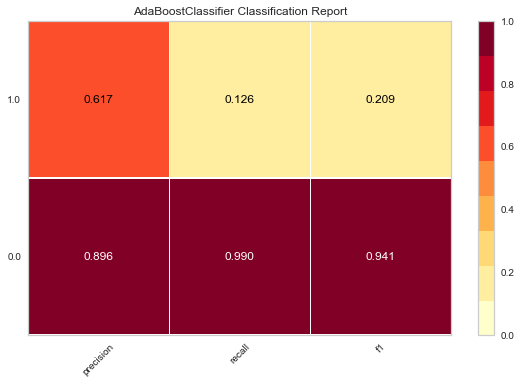

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


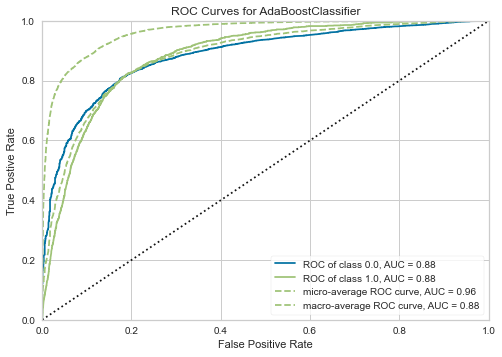

In [109]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [110]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
clf_pruned = bag.fit(StdSc_X_train, y_train)
pred_RF= clf_pruned.predict(StdSc_X_test)
#f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
tempResultsDf = pd.DataFrame({'Method':['BaggingClassifier'], 
                              'accuracy':[accuracy_score(y_test, pred_RF)],
                              'f1':[f1_score(y_test,pred_RF)],
                              'precision_score':[precision_score(y_test,pred_RF)],
                              'recall_score':[recall_score(y_test,pred_RF)],
                              'roc_auc_score':[roc_auc_score(y_test,pred_RF)]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','f1','precision_score', 'recall_score', 'roc_auc_score']]
resultsDf

Method  accuracy   f1  precision_score  recall_score  \
0      LogisticRegression      0.89 0.34             0.61          0.23   
0  DecisionTreeClassifier      0.90 0.44             0.59          0.35   
0  RandomForestClassifier      0.91 0.48             0.67          0.37   
0      AdaBoostClassifier      0.90 0.47             0.63          0.38   
0       BaggingClassifier      0.90 0.52             0.63          0.44   

   roc_auc_score  
0           0.61  
0           0.66  
0           0.67  
0           0.67  
0           0.70

In [111]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingClassifier'], 
                              'accuracy':[accuracy_score(y_test, gfc_pred)],
                              'f1':[f1_score(y_test,gfc_pred)],
                              'precision_score':[precision_score(y_test,gfc_pred)],
                              'recall_score':[recall_score(y_test,gfc_pred)],
                              'roc_auc_score':[roc_auc_score(y_test,gfc_pred)]})
resultsDf = pd.concat([resultsDf,tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','f1','precision_score', 'recall_score', 'roc_auc_score']]
resultsDf

Method  accuracy   f1  precision_score  recall_score  \
0          LogisticRegression      0.89 0.34             0.61          0.23   
0      DecisionTreeClassifier      0.90 0.44             0.59          0.35   
0      RandomForestClassifier      0.91 0.48             0.67          0.37   
0          AdaBoostClassifier      0.90 0.47             0.63          0.38   
0           BaggingClassifier      0.90 0.52             0.63          0.44   
0  GradientBoostingClassifier      0.91 0.53             0.64          0.45   

   roc_auc_score  
0           0.61  
0           0.66  
0           0.67  
0           0.67  
0           0.70  
0           0.71

In [112]:
from sklearn.model_selection import GridSearchCV

params_dict={'n_estimators':[5,10,50],'max_features':['auto','sqrt','log2']}

clf_rf =  GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=22),param_grid=params_dict,scoring='accuracy',cv=10)

clf_rf.fit(StdSc_X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=22),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 10, 50]},
             scoring='accuracy')

In [113]:
pred = clf_rf.predict(StdSc_X_test)
acc_GS = accuracy_score(pred,y_test)
acc_f1=f1_score(pred,y_test)
#f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
tempResultsDf = pd.DataFrame({'Method':['GridSearchCV'], 
                              'accuracy':[accuracy_score(y_test,pred)],
                              'f1':[f1_score(y_test,pred)],
                              'precision_score':[precision_score(y_test,pred)],
                              'recall_score':[recall_score(y_test,pred)],
                              'roc_auc_score':[roc_auc_score(y_test,pred)]})
resultsDf = pd.concat([resultsDf, tempResultsDf])



In [114]:
resultsDf.reset_index(drop=True).style.apply(lambda x: ['background: lightgreen' 
                                  if (x.Method == 'GradientBoostingClassifier')
                                  else '' for i in x], axis=1)

## Ensemble Model Estimate:
 -  gradientboost clasifier outperforms random forrestor, adaboost with 
    - Accuracy : 91 %
    - recall Score(which we are trying to maximixe ): 45 %
    - f1-score(Since data is skewed and imbalanced) : 53 % 

------------------------------------------------------------------------------------------------------------------------

## Just checking WITH SMOTE METHOD

# Oversampling Using SMOTE method: 

In [115]:
!pip install imblearn
!pip install imblearn==0.0
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_SMOTE, y_SMOTE = sm.fit_sample(StdSc_X_train, y_train)
pd.Series(y_SMOTE).value_counts()

sc = StandardScaler()
sc.fit(X_SMOTE)
X_train_std = sc.transform(X_SMOTE)
X_test_std = sc.transform(StdSc_X_test)

Accuracy Score Is :  0.806682966585167
LogisticRegression F1 score = 0.48096280087527343
LogisticRegression classification Score = 
               precision    recall  f1-score   support

         0.0       0.96      0.81      0.88     10844
         1.0       0.35      0.77      0.48      1426

    accuracy                           0.81     12270
   macro avg       0.66      0.79      0.68     12270
weighted avg       0.89      0.81      0.83     12270

Confusion Matrix Is: [[8799 2045]
 [ 327 1099]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


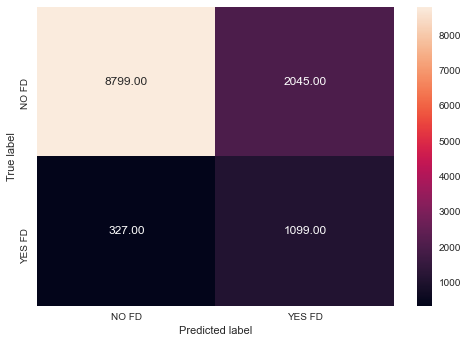

Accuracy Score Is :  0.7439282803585983
DecisionTreeClassifier F1 score = 0.42934980021794406
DecisionTreeClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.97      0.73      0.83     10844
         1.0       0.29      0.83      0.43      1426

    accuracy                           0.74     12270
   macro avg       0.63      0.78      0.63     12270
weighted avg       0.89      0.74      0.79     12270

Confusion Matrix Is: [[7946 2898]
 [ 244 1182]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


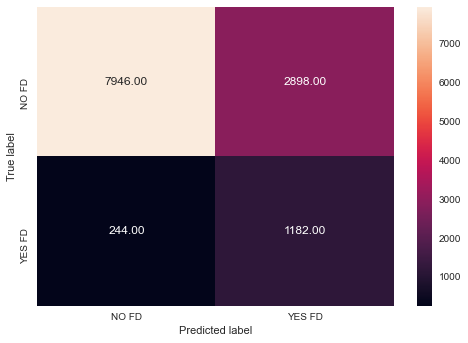

In [116]:
def scorer_bal(i,j):
    for model in (i,j):
        model.fit(X_train_std,y_SMOTE)
        yhat= model.predict(X_test_std)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(model.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(model.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
        draw_confmatrix(y_test, yhat, "NO FD", "YES FD")
        
scorer_bal(lr,dtree)

Accuracy Score Is :  0.90440097799511
RandomForestClassifier F1 score = 0.5928497049635544
RandomForestClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     10844
         1.0       0.59      0.60      0.59      1426

    accuracy                           0.90     12270
   macro avg       0.77      0.77      0.77     12270
weighted avg       0.91      0.90      0.90     12270

Confusion Matrix Is: [[10243   601]
 [  572   854]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


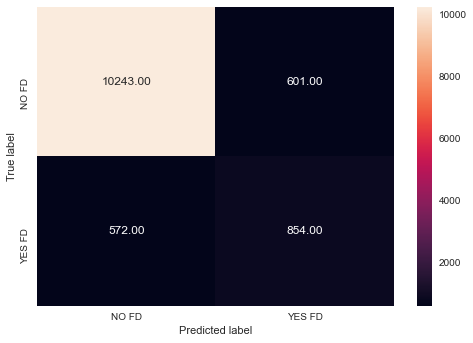

Accuracy Score Is :  0.9093724531377343
GradientBoostingClassifier F1 score = 0.5716486902927581
GradientBoostingClassifier classification Score = 
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     10844
         1.0       0.63      0.52      0.57      1426

    accuracy                           0.91     12270
   macro avg       0.79      0.74      0.76     12270
weighted avg       0.90      0.91      0.91     12270

Confusion Matrix Is: [[10416   428]
 [  684   742]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


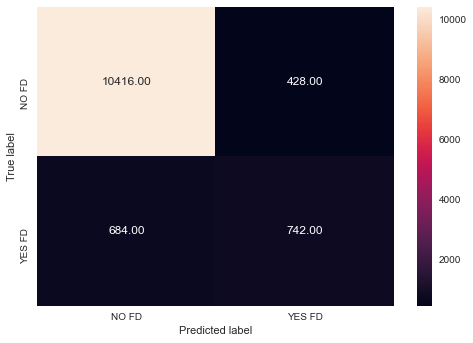

In [117]:
def scorer_bal(i,j):
    for model in (i,j):
        model.fit(X_train_std,y_SMOTE)
        yhat= model.predict(X_test_std)
        print("Accuracy Score Is : ", accuracy_score(y_test, yhat))
        print(model.__class__.__name__, 'F1 score =', f1_score(y_test, yhat))
        print(model.__class__.__name__, 'classification Score =','\n', classification_report(y_test, yhat))
        draw_confmatrix(y_test, yhat, "NO FD", "YES FD")        
scorer_bal(rfc,Gfc)

### F1/Recall/Precision can be improved with SMOTE